In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import plot_text as pt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# Read the Excel file into a DataFrame
data_yt = pd.read_excel(r'D:\Dataset\Homework\youtube_statistics.xlsx')

# Display the contents of the DataFrame
data_yt

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,False,False,False,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,False,False,False,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13


In [4]:
data_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

# Exploratory Data Analysis

## Univariate Analysis

In [5]:
# Copying the dataset to use for EDA
data_yt2 = data_yt.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Using labelencoder to convert feature with categories to numeric
data_yt2['comments_disabled'] = label_encoder.fit_transform(data_yt2['comments_disabled'])
data_yt2['ratings_disabled'] = label_encoder.fit_transform(data_yt2['ratings_disabled'])
data_yt2['video_error_or_removed'] = label_encoder.fit_transform(data_yt2['video_error_or_removed'])

# Display dataframe after changes
display(data_yt2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,0,0,0,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,0,0,0,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,0,0,0,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,0,0,0,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,0,0,0,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13


In [7]:
cats = ['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description', 'publish_date']
nums = ['views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'No_tags','desc_len', 'len_title']

In [8]:
data_yt2[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
views,36791.0,1.071490e+06,3.207149e+06,4024.0,125604.0,307836.0,806631.5,125432237.0
likes,36791.0,2.745069e+04,9.783129e+04,0.0,879.0,3126.0,14095.0,2912710.0
dislikes,36791.0,1.685363e+03,1.619732e+04,0.0,109.0,331.0,1032.0,1545017.0
comment_count,36791.0,2.714022e+03,1.497811e+04,0.0,83.0,336.0,1314.5,827755.0
comments_disabled,36791.0,3.207306e-02,1.761965e-01,0.0,0.0,0.0,0.0,1.0
ratings_disabled,36791.0,2.057568e-02,1.419608e-01,0.0,0.0,0.0,0.0,1.0
video_error_or_removed,36791.0,2.989862e-04,1.728887e-02,0.0,0.0,0.0,0.0,1.0
No_tags,36791.0,1.893846e+01,9.843531e+00,1.0,12.0,19.0,25.0,72.0
desc_len,36791.0,9.230791e+02,8.150389e+02,3.0,368.0,677.0,1237.0,5136.0
len_title,36791.0,7.060936e+01,2.240917e+01,5.0,53.0,74.0,91.0,100.0


In [9]:
data_yt2[cats].describe().T

,count,mean,min,25%,50%,75%,max
publish_date,36791,2018-02-24 11:20:36.334973440,2017-05-27 00:00:00,2017-12-31 00:00:00,2018-02-23 00:00:00,2018-04-23 00:00:00,2018-06-13 00:00:00


In [10]:
# Creating function to categorize views
def segmentasi_views(nilai):
    if nilai < 300000:
        return 'rendah'
    else:
        return 'tinggi'

# Creating new feature views_segmentasi and applying the previous function
data_yt2['views_segmentasi'] = data_yt2['views'].apply(segmentasi_views)

# Display dataframe after changes
data_yt2.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,views_segmentasi
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,0,0,0,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,tinggi
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,tinggi
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,tinggi
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12,tinggi
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,tinggi


In [11]:
jumlah_tinggi = (data_yt2['views_segmentasi'] == 'tinggi').sum()
jumlah_rendah = (data_yt2['views_segmentasi'] == 'rendah').sum()

print("Jumlah nilai 'tinggi' di kolom 'views_segmentasi':", jumlah_tinggi)
print("Jumlah nilai 'rendah' di kolom 'views_segmentasi':", jumlah_rendah)

Jumlah nilai 'tinggi' di kolom 'views_segmentasi': 18667
Jumlah nilai 'rendah' di kolom 'views_segmentasi': 18124


In [12]:
# Creating function to categorize the day
def segmentasi_hari(hari):
    if hari in [5, 6]:  # 5 = Sabtu, 6 = Minggu
        return 'weekend'
    else:
        return 'weekday'

# Creating new feature day_segmentation and applying the previous function
data_yt2['day_segmentation'] = data_yt2['publish_date'].dt.dayofweek.apply(segmentasi_hari)

# Display the dataframe after changes
data_yt2

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,views_segmentasi,day_segmentation
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,0,0,0,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,tinggi,weekend
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,1,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,tinggi,weekday
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,0,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,tinggi,weekend
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,0,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12,tinggi,weekend
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,0,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,tinggi,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,0,0,0,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13,rendah,weekday
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,0,0,0,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13,tinggi,weekday
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,0,0,0,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13,tinggi,weekday
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,0,0,0,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13,rendah,weekday


In [13]:
data_yt2['publish_time'] = pd.to_datetime(data_yt2['publish_time'], errors='coerce')

# Function to group the time
def segmentasi_waktu(waktu):
    if pd.isnull(waktu):
        return None  # Mengembalikan None jika terdapat nilai yang tidak valid
    if waktu.hour >= 6 and waktu.hour < 18:
        return 'siang'
    else:
        return 'malam'

# Creating new feature time_segmentation and applying the previous function
data_yt2['time_segmentation'] = data_yt2['publish_time'].apply(segmentasi_waktu)

In [14]:
# Getting the hour and minute from publish_time
data_yt2['publish_time'] = data_yt2['publish_time'].dt.strftime('%H:%M')

# display dataframe after changes
data_yt2

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,views_segmentasi,day_segmentation,time_segmentation
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,0,0,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,tinggi,weekend,siang
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,0,0,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,tinggi,weekday,malam
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,0,0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,tinggi,weekend,siang
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,0,0,This video showcases the difference between pe...,20,263,30,2017-11-12,tinggi,weekend,siang
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,0,0,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,tinggi,weekday,malam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,...,0,0,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13,rendah,weekday,siang
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,...,0,0,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13,tinggi,weekday,siang
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,...,0,0,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13,tinggi,weekday,malam
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,...,0,0,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13,rendah,weekday,siang


In [15]:
# Categorized based on features type
num = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
cat = ['channel_title', 'publish_time', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

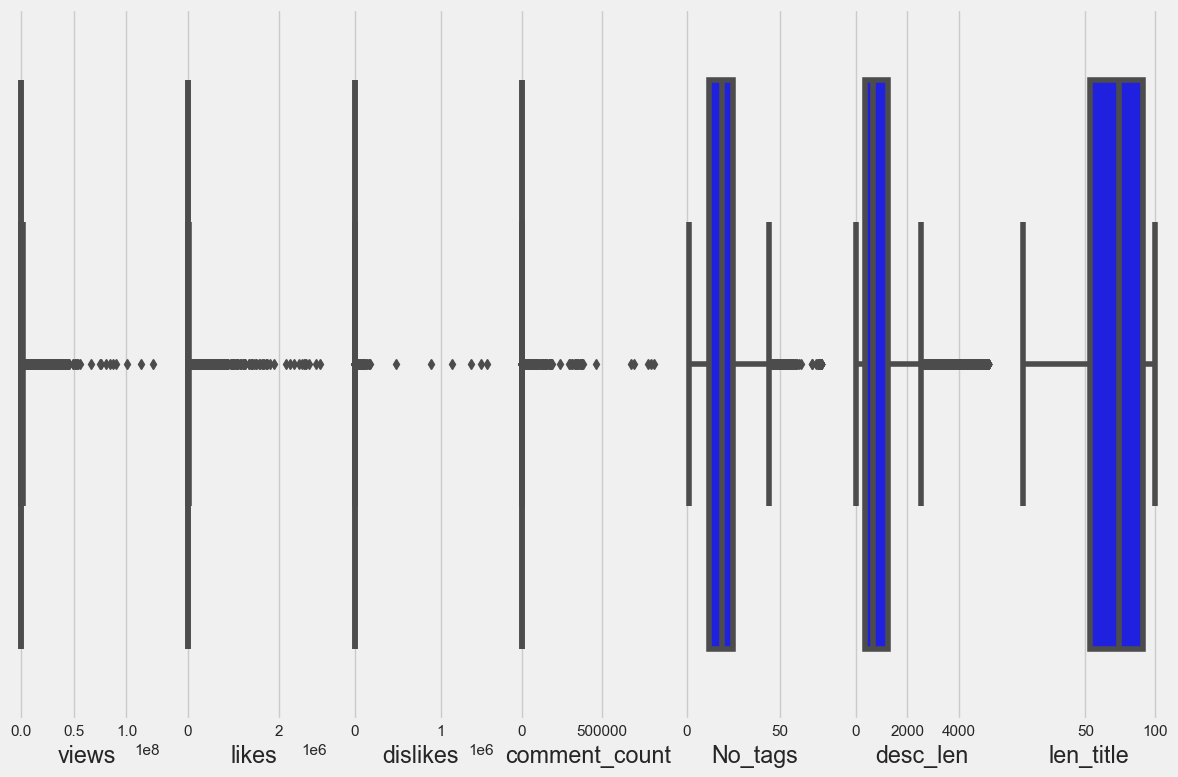

In [16]:
plt.figure(figsize=(12,8))

for i in range(0, len(num)):
    plt.subplot(1, len(num), i + 1)
    sns.boxplot(x=data_yt2[num[i]], color='blue', orient='v')
    plt.xlabel(num[i])
    plt.tight_layout()

plt.show()

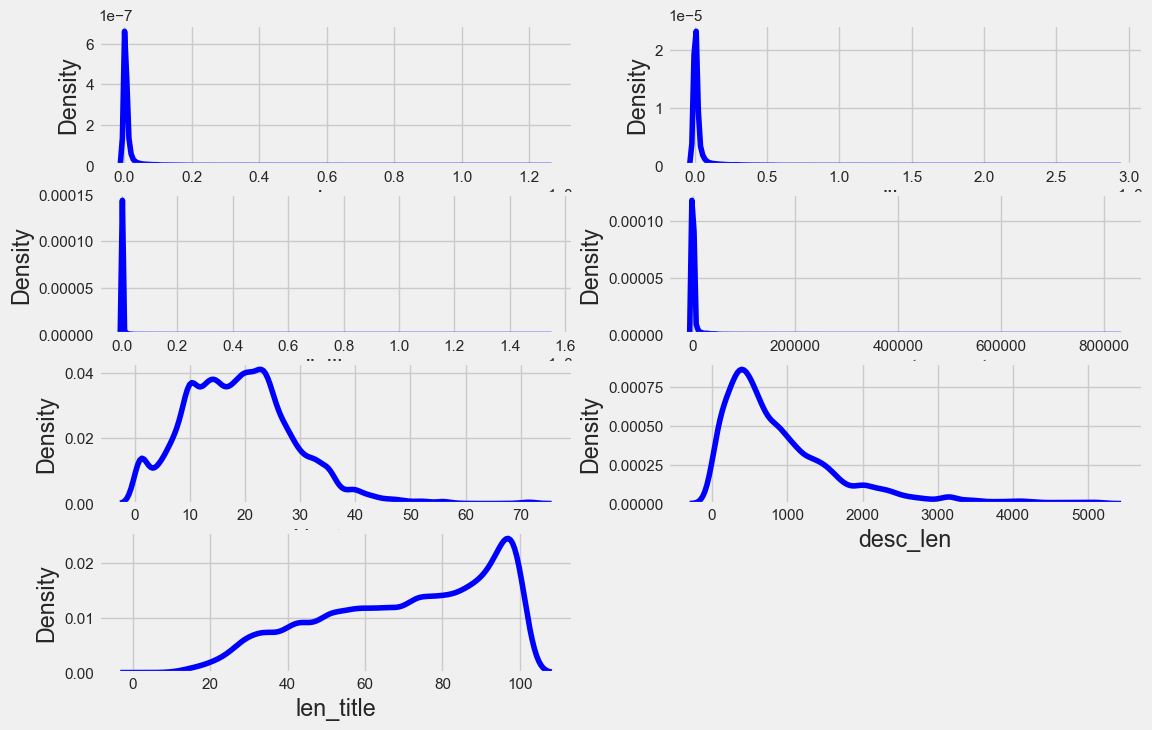

In [17]:
plt.figure(figsize=(12,8))

for i in range(0, len(num)):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=data_yt2[num[i]], color='blue')
    plt.xlabel(num[i])

plt.show()

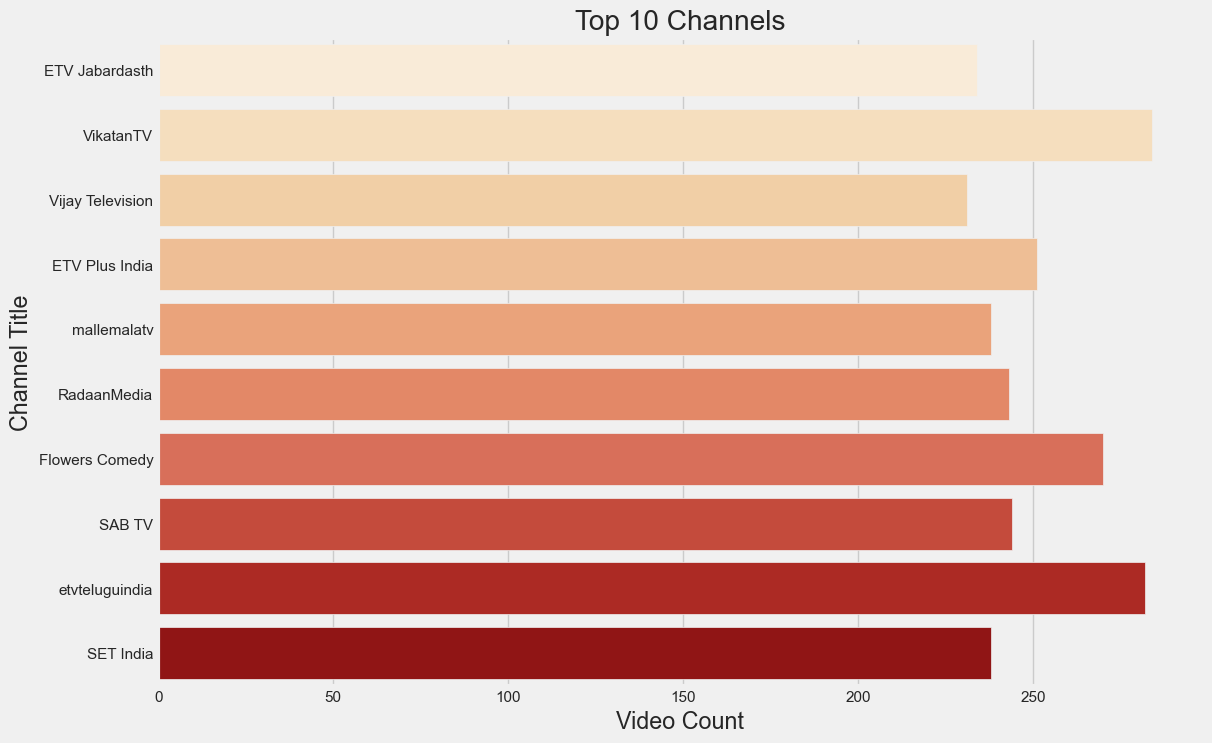

In [18]:
# Choosing top 10 based on the frequency from 'channel_title'
top_channels = data_yt2['channel_title'].value_counts().head(10).index.tolist()
subset_df = data_yt2[data_yt2['channel_title'].isin(top_channels)]

plt.figure(figsize=(12, 8))
sns.countplot(y='channel_title', data=subset_df, palette='OrRd')
plt.title('Top 10 Channels')
plt.xlabel('Video Count')
plt.ylabel('Channel Title')
plt.show()

In [19]:
channel_title_lengths = {channel: {'total_length': 0, 'count': 0} for channel in top_channels}
temp_df = pd.DataFrame(columns=['Channels','avg_title_len'])

for index, row in data_yt.iterrows():
    channels_name = row['channel_title']
    if channels_name in top_channels:
        len_title = len(row['title'])
        channel_title_lengths[channels_name]['total_length'] += len_title
        channel_title_lengths[channels_name]['count'] += 1

for channel, values in channel_title_lengths.items():
    avg_len = values['total_length']/values['count']
    temp_df.loc[len(temp_df)] = [channel, avg_len]

In [20]:
temp_df.round()

,Channels,avg_title_len
0,VikatanTV,34.0
1,etvteluguindia,68.0
2,Flowers Comedy,30.0
3,ETV Plus India,65.0
4,SAB TV,81.0
5,RadaanMedia,50.0
6,mallemalatv,91.0
7,SET India,62.0
8,ETV Jabardasth,74.0
9,Vijay Television,47.0


In [21]:
print(f"Top 10 channels average title length: {temp_df['avg_title_len'].mean().round()}")

Top 10 channels average title length: 60.0


#### Notes:
- The top 10 channels titled their videos with an average of 60 characters, which will be considered a long title.

In [22]:
def title_conversion(df):
    for index, row in df.iterrows():
        if row['len_title'] <= 25:
            df.at[index, 'title'] = 'Short'
        elif row['len_title'] <= 50:
            df.at[index, 'title'] = 'Moderate'
        elif row['len_title'] <= 60:
            df.at[index, 'title'] = 'Top 10 Length'
        else:
            df.at[index, 'title'] = 'Long'

In [23]:
title_conversion(data_yt2)

In [24]:
data_yt2['title'].value_counts()

title
Long             24512
Moderate          7224
Top 10 Length     4223
Short              832
Name: count, dtype: int64

In [25]:
df_tags_grp = data_yt2.groupby(['title','views_segmentasi']).agg(view_cnt=('views_segmentasi','count')).sort_values('view_cnt', ascending=False)
df_tags_grp['percentages'] = round(df_tags_grp['view_cnt']/df_tags_grp['view_cnt'].sum()*100,2)

df_tags_grp.reset_index(inplace=True)

In [26]:
df_tags_grp

,title,views_segmentasi,view_cnt,percentages
0,Long,rendah,13037,35.44
1,Long,tinggi,11475,31.19
2,Moderate,tinggi,4553,12.38
3,Moderate,rendah,2671,7.26
4,Top 10 Length,rendah,2197,5.97
5,Top 10 Length,tinggi,2026,5.51
6,Short,tinggi,613,1.67
7,Short,rendah,219,0.60


Text(0, 0.5, 'Percentage by Total Videos')

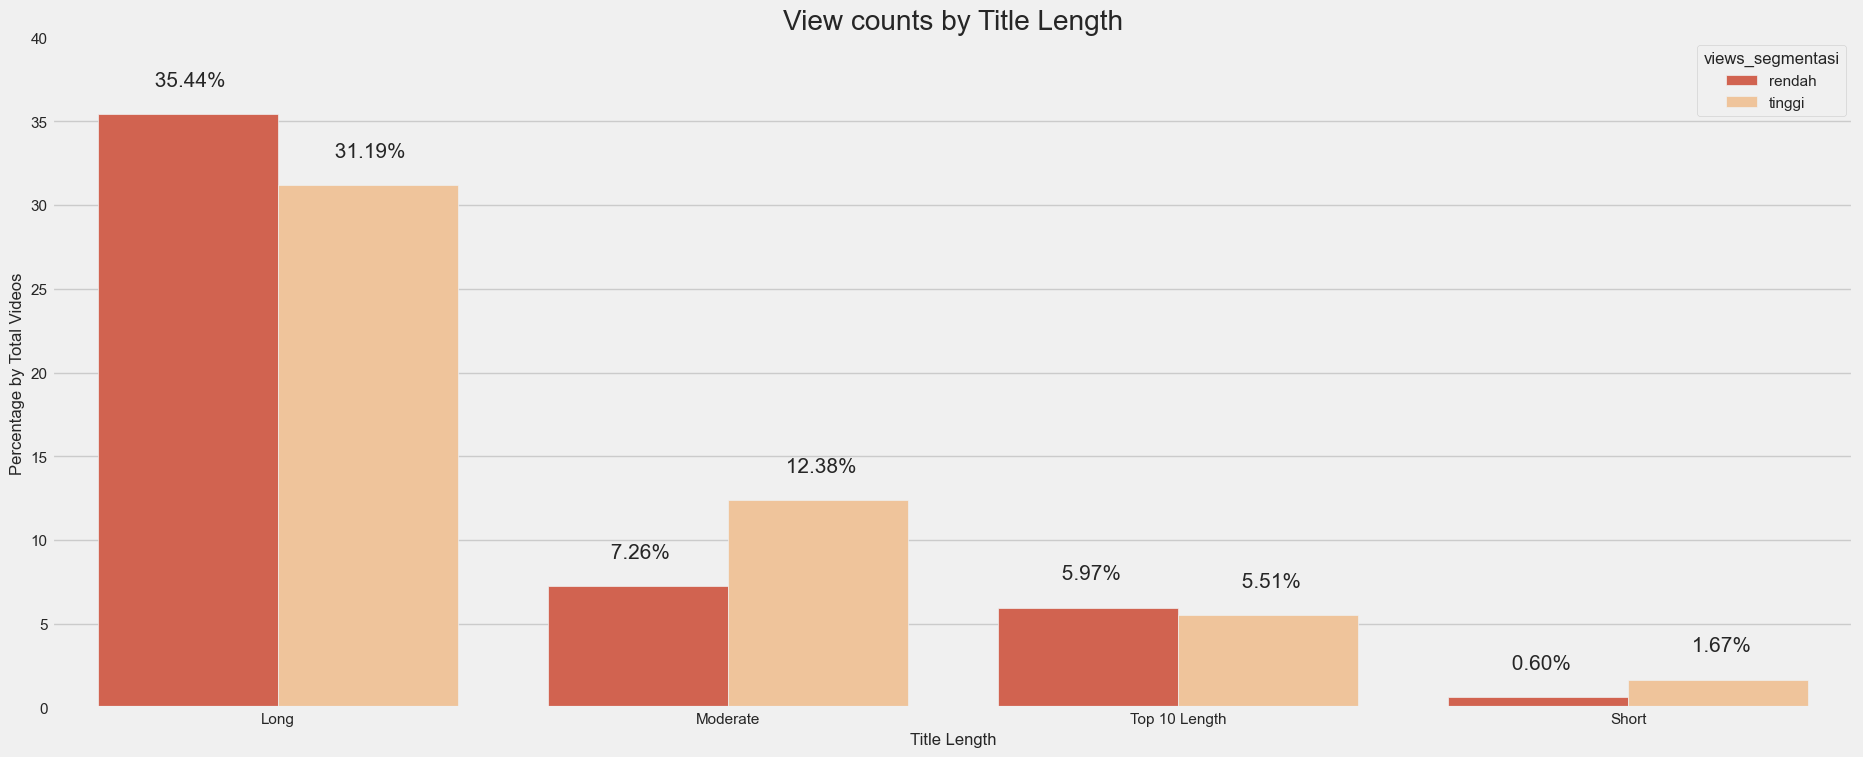

In [27]:
# Create barplot for Target
ax_diff = sns.barplot(x='title', y='percentages', hue='views_segmentasi', data=df_tags_grp, palette='OrRd_r')

pt.get_text(ax_diff,2,2, 15)

# Formatting plot
plt.ylim(0, 40)

plt.title('View counts by Title Length')
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Percentage by Total Videos',fontsize=12)

#### Insight:
- The majority of videos have long titles, and a significant portion (35.44%) of the videos have low views. The difference between the number of high-view and low-view videos is more than 4% and leans towards low views. This suggests that the dominance of long titles might be a contributing factor to lower viewership. Long titles can be less attention-grabbing and informative at a glance when browsing YouTube. This finding aligns with Google's recommendation for concise titles that clearly convey the video's intent, which can also directly impact YouTube SEO discoverability.
- Videos with titles of moderate length exhibit the highest margin between high and low view counts. This margin exceeds 5%, and it leans towards high views. This indicates that videos with moderate length of title are generally able to convey the intent of the video more effectively compared to videos with long titles.
- Videos with titles matching the length of the top 10 channels have roughly a 50/50 chance of receiving high or low views, with a slight margin (0.46%) leaning towards low views. This suggests that title length might not be a deciding factor in garnering high views. Content creators may need to focus on making their titles stand out in other ways, such as incorporating specific keywords that clearly communicate the video's intent to viewers.
- Viewership for videos with short titles seem to perform well. 1.67% of videos with short titles have high views, while only 0.60% in this category have low views.

In [28]:
# Categorizing the number of tags used into 4 categories
def tags_conversion(df):
    for index, row in df.iterrows():
        split_tags = row['tags'].split('|')
        len_tags = round(len(split_tags))
        if len_tags == 1:
            df.at[index, 'tags'] = 'Single'
        elif len_tags <= 18:
            df.at[index, 'tags'] = 'Few'
        elif len_tags <= 36:
            df.at[index, 'tags'] = 'Several'
        else:
            df.at[index, 'tags'] = 'Many'

In [29]:
tags_conversion(data_yt2)

In [30]:
data_yt2['tags'].value_counts()

tags
Few        17025
Several    17017
Many        1492
Single      1257
Name: count, dtype: int64

In [31]:
for index, row in data_yt2.iterrows():
    title_length = row['title']
    tags = row['tags']
    title_with_tags = f"{title_length} Title, {tags.capitalize()} Tags"
    data_yt2.at[index, 'title_with_tags'] = title_with_tags

In [32]:
data_yt2['title_with_tags'].value_counts()

title_with_tags
Long Title, Several Tags             12026
Long Title, Few Tags                 10857
Moderate Title, Few Tags              3683
Moderate Title, Several Tags          2898
Top 10 Length Title, Few Tags         2043
Top 10 Length Title, Several Tags     1792
Long Title, Single Tags                854
Long Title, Many Tags                  775
Short Title, Few Tags                  442
Moderate Title, Many Tags              426
Short Title, Several Tags              301
Top 10 Length Title, Many Tags         239
Moderate Title, Single Tags            217
Top 10 Length Title, Single Tags       149
Short Title, Many Tags                  52
Short Title, Single Tags                37
Name: count, dtype: int64

In [33]:
df_titles_grp = data_yt2.groupby(['title_with_tags','views_segmentasi']).agg(views_cnt=('views_segmentasi','count')).sort_values('views_cnt', ascending=False)
df_titles_grp['Percentages'] = round(df_titles_grp['views_cnt']/df_titles_grp['views_cnt'].sum()*100,2)

df_titles_grp.reset_index(inplace=True)

In [34]:
df_titles_grp.head()

,title_with_tags,views_segmentasi,views_cnt,Percentages
0,"Long Title, Several Tags",tinggi,6222,16.91
1,"Long Title, Few Tags",rendah,6168,16.76
2,"Long Title, Several Tags",rendah,5804,15.78
3,"Long Title, Few Tags",tinggi,4689,12.74
4,"Moderate Title, Few Tags",tinggi,2326,6.32


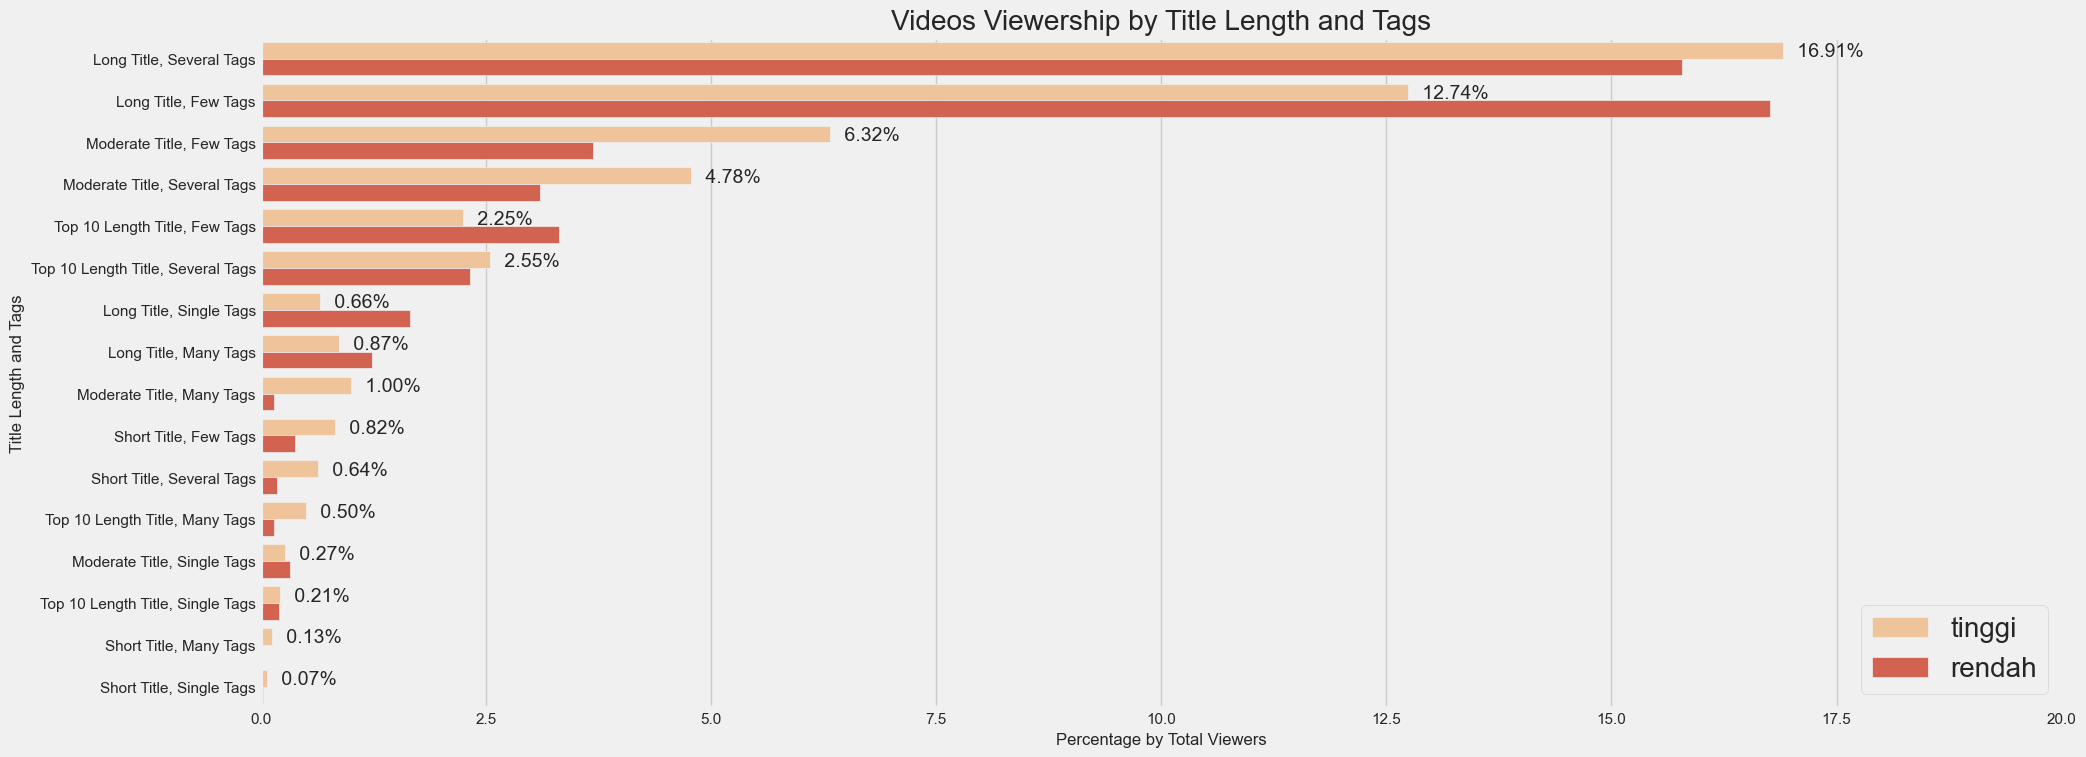

In [35]:
# Create barplot for the newly created 'title_with_tags'

ax_hbartype = sns.barplot(y='title_with_tags', x='Percentages', hue='views_segmentasi',data=df_titles_grp, palette='OrRd', orient='horizontal')
        
pt.get_text_horz(ax_hbartype, 0.1, -0.05, 15, 'partial')

# Formatting plot
plt.xlim(0,20)
plt.legend(loc='lower right', fontsize=20)
plt.title("Videos Viewership by Title Length and Tags")
plt.xlabel('Percentage by Total Viewers',fontsize=12)
plt.ylabel('Title Length and Tags',fontsize=12)

plt.show()

#### Insight:
- Videos with long titles and that include several relevant tags appear to be most effective in gaining high views, with 16.91% of total videos falling into this category. This finding reinforces the importance of using relevant keywords as part of SEO and titles that are long enough to convey the video's message clearly.
- Result shows that content creator who want to use a moderately long title in their videos should also supplement their video by including a few tags. Videos with moderately long titles and few tags appear to be the most efficient in terms of viewership in this title length category, with 6.32% of videos in this category achieving high views. This suggests that there is a link between title length and the effectiveness of tags as part of SEO utilization in getting videos picked up by YouTube's recommendation algorithm.
- Content creator that want to use shorter title is suggested to include a few tags in their videos, this is because the analysis indicates that supplementing them with a few relevant tags can be more effective. In the short title category, the combination with few tags shows the highest efficiency, with 0.82% of videos achieving high views.

In [36]:
data_yt2['comments_disabled'].value_counts()

comments_disabled
0    35611
1     1180
Name: count, dtype: int64

In [37]:
data_yt2['comments_disabled'] = data_yt2['comments_disabled'].apply(lambda x: 'disabled' if x == True else 'enabled')

In [38]:
df_cmt_grp = data_yt2.groupby(['comments_disabled']).agg(view_cnt=('views','sum')).sort_values('view_cnt', ascending=False)
df_cmt_grp['percentages'] = round(df_cmt_grp['view_cnt']/df_cmt_grp['view_cnt'].sum()*100,2)

df_cmt_grp.reset_index(inplace=True)

In [39]:
df_cmt_grp

,comments_disabled,view_cnt,percentages
0,enabled,38874041617,98.61
1,disabled,547156501,1.39


Text(0, 0.5, 'Percentage by Total Viewers')

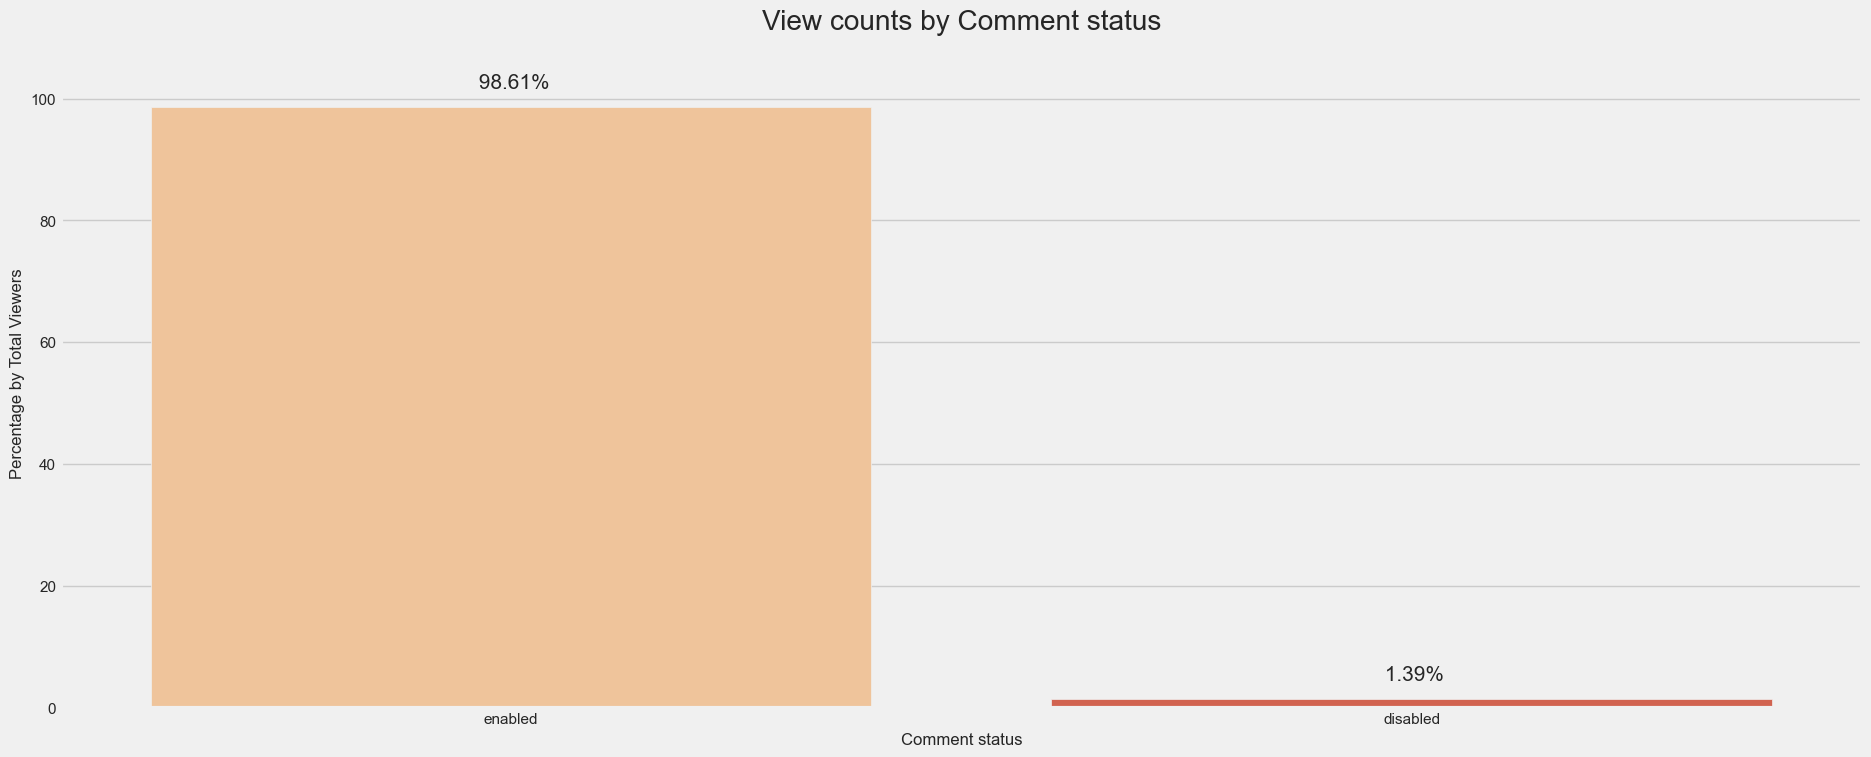

In [40]:
# Create barplot for Target
ax_diff = sns.barplot(x='comments_disabled', y='percentages', data=df_cmt_grp, palette='OrRd')

pt.get_text(ax_diff,2,4, 15)

# Formatting plot
plt.ylim(0, 110)

plt.title('View counts by Comment status')
plt.xlabel('Comment status',fontsize=12)
plt.ylabel('Percentage by Total Viewers',fontsize=12)

#### Insight:
- There is a significant difference in view percentages between videos with their comment sections enabled and disabled. Approximately 98.61% of total views are on videos with comments enabled, compared to a mere 1.39% on videos with disabled comment sections. This is because comments in videos often act as a vessel for viewers to voice their opinions about the video, as quoted from dubverse.ai, which stated, "Comments are a direct way for viewers to interact with content creators."
- The majority of views on videos with comments enabled suggest that viewers are more interested in watching videos that allow for interpretation through comments. This indicates a high demand for videos that stimulate this type of engagement.

In [41]:
# change the minimum value of likes and dislikes from 0 to 1
data_yt2['likes'] = data_yt2['likes'].apply(lambda x: 1 if x < 1 else x)
data_yt2['dislikes'] = data_yt2['dislikes'].apply(lambda x: 1 if x < 1 else x)

In [42]:
# Categorizing likes to views into 3 categories
for index, row in data_yt2.iterrows():
    likes_toviews = round((row['likes']/row['views'])*100,2)
    dislikes_tolikes = round((row['dislikes']/row['likes'])*100,2)
    if likes_toviews < 1:
        data_yt2.at[index, 'likestoviews_ratio'] = 'Low Engagement'
    elif likes_toviews < 3:
        data_yt2.at[index, 'likestoviews_ratio'] = 'Moderate Engagement'
    else:
        data_yt2.at[index, 'likestoviews_ratio'] = 'High Engagement'

In [43]:
df_engage_grp = data_yt2.groupby(['likestoviews_ratio', 'views_segmentasi']).agg(view_cnt=('views_segmentasi','count')).sort_values('view_cnt', ascending=True)
df_engage_grp['percentages'] = round(df_engage_grp['view_cnt']/df_engage_grp['view_cnt'].sum()*100,2)

df_engage_grp.reset_index(inplace=True)

In [44]:
df_engage_grp

,likestoviews_ratio,views_segmentasi,view_cnt,percentages
0,Moderate Engagement,rendah,3781,10.28
1,High Engagement,rendah,3978,10.81
2,High Engagement,tinggi,4989,13.56
3,Moderate Engagement,tinggi,5373,14.60
4,Low Engagement,tinggi,8305,22.57
5,Low Engagement,rendah,10365,28.17


In [45]:
# Combine and categorized into 4 categories
for index, row in data_yt2.iterrows():
    if row['comments_disabled']=='disabled':
        if row['likestoviews_ratio'] in ['Moderate Engagement', 'High Engagement']:
            data_yt2.at[index, 'Videos_category'] = 'Comments Disabled, Good engagement'
        else:
            data_yt2.at[index, 'Videos_category'] = 'Comments Disabled, Bad engagement'
    else:
        if row['likestoviews_ratio'] in ['Moderate Engagement', 'High Engagement']:
            data_yt2.at[index, 'Videos_category'] = 'Comments Enabled, Good engagement'
        else:
            data_yt2.at[index, 'Videos_category'] = 'Comments Enabled, Bad engagement'

In [46]:
df_ratio_grp = data_yt2.groupby(['Videos_category','views_segmentasi']).agg(views_cnt=('views_segmentasi','count')).sort_values('views_cnt', ascending=False)
df_ratio_grp['Percentages'] = round(df_ratio_grp['views_cnt']/df_ratio_grp['views_cnt'].sum()*100,2)

df_ratio_grp.reset_index(inplace=True)

In [47]:
df_ratio_grp

,Videos_category,views_segmentasi,views_cnt,Percentages
0,"Comments Enabled, Good engagement",tinggi,10307,28.02
1,"Comments Enabled, Bad engagement",rendah,9783,26.59
2,"Comments Enabled, Bad engagement",tinggi,7854,21.35
3,"Comments Enabled, Good engagement",rendah,7667,20.84
4,"Comments Disabled, Bad engagement",rendah,582,1.58
5,"Comments Disabled, Bad engagement",tinggi,451,1.23
6,"Comments Disabled, Good engagement",rendah,92,0.25
7,"Comments Disabled, Good engagement",tinggi,55,0.15


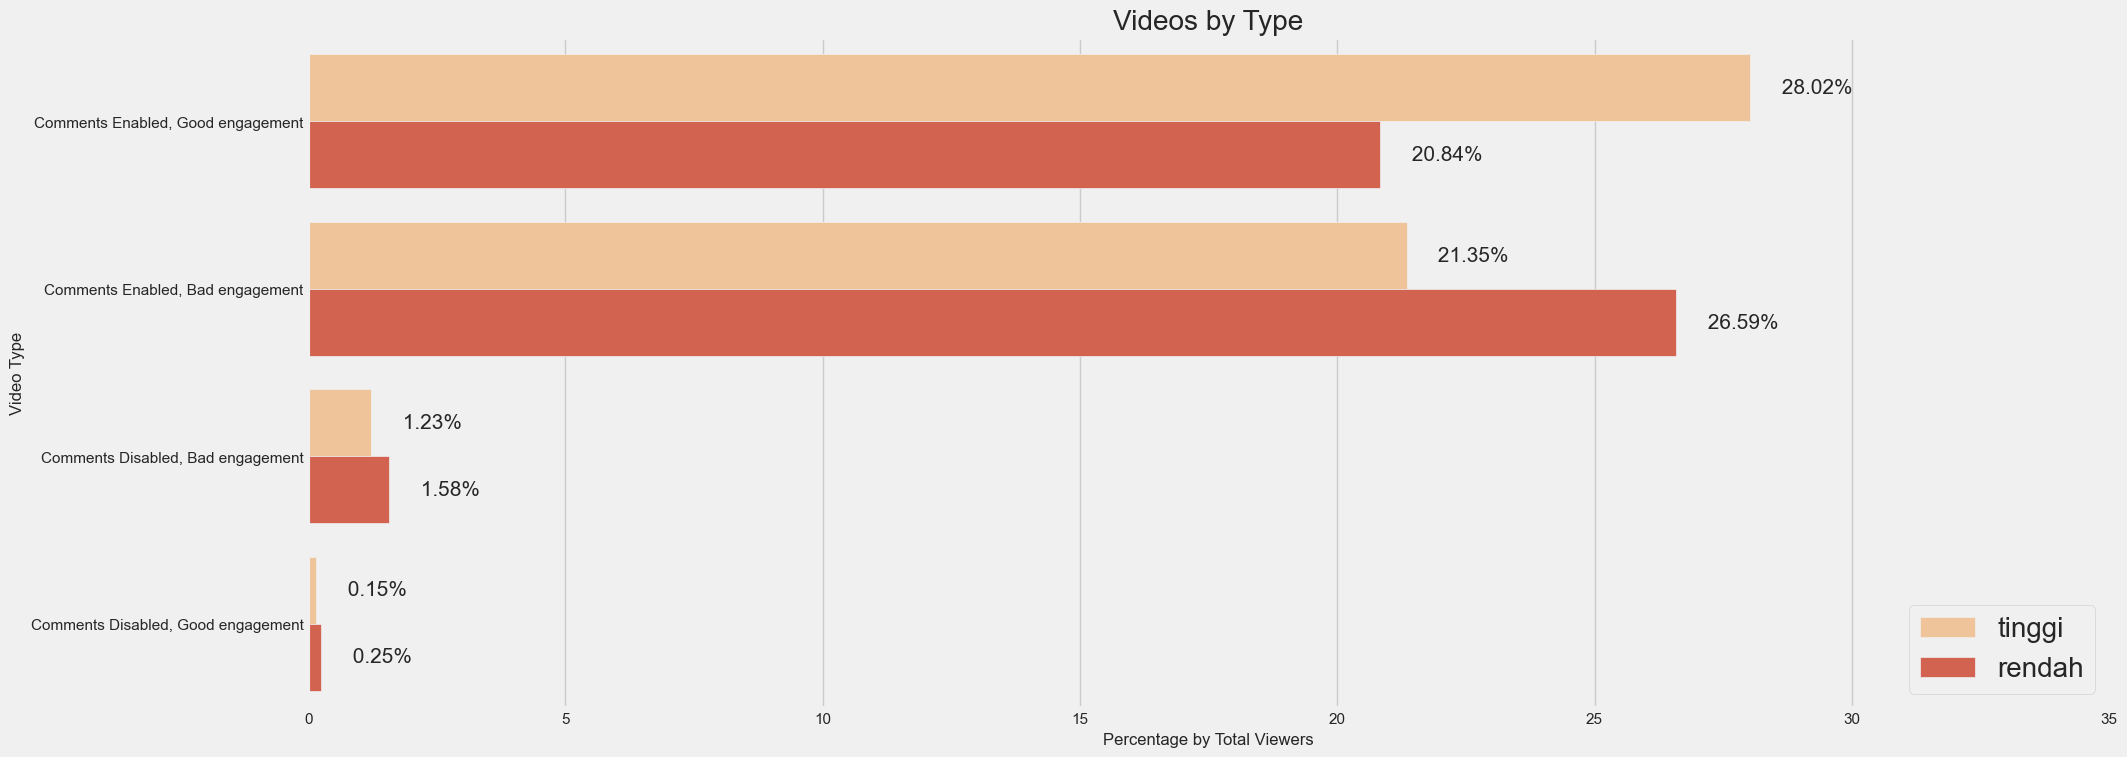

In [48]:
# Create barplot for purpose

ax_hbartype = sns.barplot(y='Videos_category', x='Percentages', hue='views_segmentasi',data=df_ratio_grp, palette='OrRd', orient='horizontal')
        
pt.get_text_horz(ax_hbartype, 0.5, 2, 15, 'all')

# Formatting plot
plt.xlim(0,35)
plt.legend(loc='lower right', fontsize=20)
plt.title("Videos by Type")
plt.xlabel('Percentage by Total Viewers',fontsize=12)
plt.ylabel('Video Type',fontsize=12)

plt.show()

#### Insight:
- The analysis reveals a connection between enabling comments, fostering audience engagement, and achieving high viewership. Nearly 28% of videos fall into this category, suggesting that allowing viewers to comment and creating relatable content are important strategies for content creators. However, the results are nuanced. Over 21% of videos with high views have comments enabled but lack strong engagement. This further suggests that while comments might help the likelihood of views, relatable content remains a key factor in how viewers perceive the quality of a video.
- Videos with comments disabled, regardless of engagement level (bad or good), make up a small portion of the total. Only 1.23% of videos have high views with comments disabled and bad engagement, and 0.15% have high views with comments disabled but good engagement. This indicates that while enabling comments and encouraging engagement can be beneficial for viewer interaction and potentially increasing views, the impact of enabling or disabling comments would be an after-effect of having quality content that promote interest in the viewers.

In [49]:
def time_conversion(df):
    df['publish_time'] = df['publish_time'].str.slice(stop=2)
    df['publish_time'] = df['publish_time'].astype(int)
    for index, row in df.iterrows():
        if row['publish_time'] in range(6,12):
            df.at[index, 'publish_time'] = 'Morning'
        elif row['publish_time'] in range(12,18):
            df.at[index, 'publish_time'] = 'Afternoon'
        elif row['publish_time'] in range(18,23) or row['publish_time'] in [23, 0]:
            df.at[index, 'publish_time'] = 'Evening'
        else:
            df.at[index, 'publish_time'] = 'Night'

In [50]:
time_conversion(data_yt2)

In [51]:
data_yt2['publish_time'].value_counts()

publish_time
Afternoon    13909
Morning      12497
Night         6904
Evening       3481
Name: count, dtype: int64

In [52]:
df_time_grp = data_yt2.groupby(['publish_time','views_segmentasi']).agg(views_cnt=('views_segmentasi','count')).sort_values('views_cnt', ascending=False)
df_time_grp['Percentages'] = round(df_time_grp['views_cnt']/df_time_grp['views_cnt'].sum()*100,2)

df_time_grp.reset_index(inplace=True)

In [53]:
df_time_grp

,publish_time,views_segmentasi,views_cnt,Percentages
0,Afternoon,tinggi,7081,19.25
1,Afternoon,rendah,6828,18.56
2,Morning,tinggi,6368,17.31
3,Morning,rendah,6129,16.66
4,Night,tinggi,3513,9.55
5,Night,rendah,3391,9.22
6,Evening,rendah,1776,4.83
7,Evening,tinggi,1705,4.63


Text(0, 0.5, 'Percentage by Total Viewer')

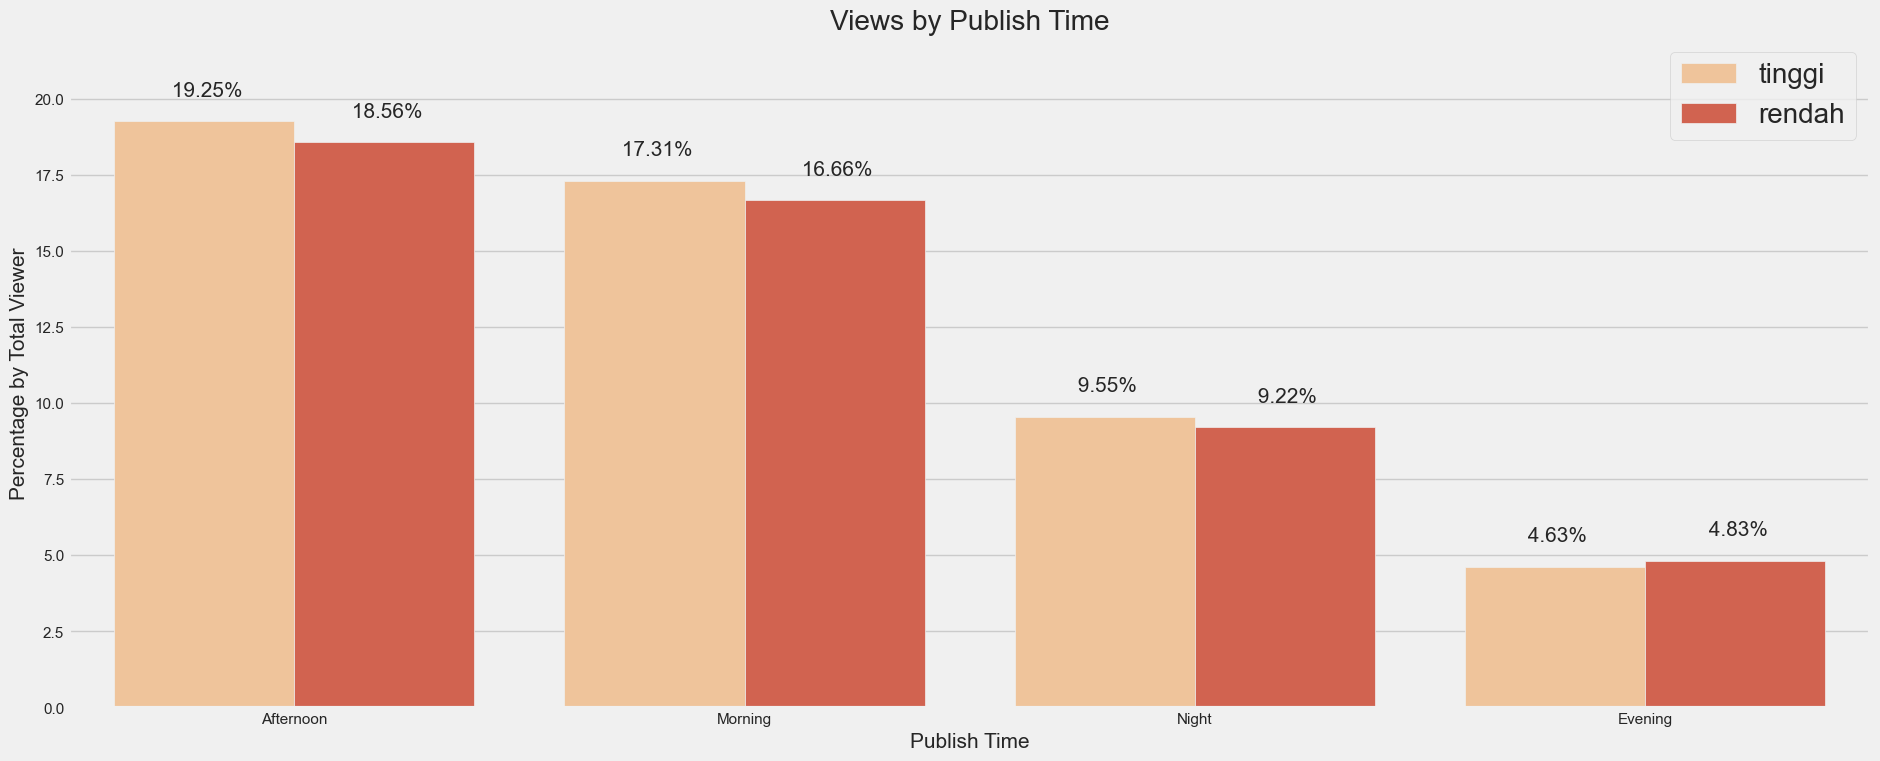

In [54]:
# Create barplot for Target
ax_diff = sns.barplot(x='publish_time', y='Percentages', hue='views_segmentasi', data=df_time_grp, palette='OrRd')

pt.get_text(ax_diff,2,1, 15)

# Formatting plot
plt.ylim(0, 22)

plt.title('Views by Publish Time')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Publish Time',fontsize=15)
plt.ylabel('Percentage by Total Viewer',fontsize=15)

#### Insight:
- Videos uploaded in the afternoon have the highest proportion of videos with a high view count, reaching 19.25%, compared to videos with low views which account for 18.56%.
- Across all categories, it has been oberserved that there is a consistent trend: the difference between the number of videos with high and low views is consistently less than 1%. This suggests that the publish time might not significantly impact the high and low of viewership.
- Mornings and afternoons see 2 to 3 times more video being published compared to evenings and nights. This suggests that publishing videos in the morning or afternoon might be beneficial, as these periods likely coincide with higher viewer activity. This finding aligns with research done by Sprout Social, the peak engagement times of social media in general are from 9 a.m. to 2 p.m., which is the time when users are most active and taking a quick break.

## Multivariate Analysis

In [55]:
data_yt2[num].corr()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
views,1.000000,0.850073,0.543310,0.674151,0.055327,0.122142,-0.051559
likes,0.850073,1.000000,0.494517,0.780445,0.019600,0.065086,-0.170257
dislikes,0.543310,0.494517,1.000000,0.708100,0.033724,0.035030,-0.030299
comment_count,0.674151,0.780445,0.708100,1.000000,0.020227,0.031604,-0.119092
No_tags,0.055327,0.019600,0.033724,0.020227,1.000000,0.177760,0.041871
desc_len,0.122142,0.065086,0.035030,0.031604,0.177760,1.000000,0.159658
len_title,-0.051559,-0.170257,-0.030299,-0.119092,0.041871,0.159658,1.000000


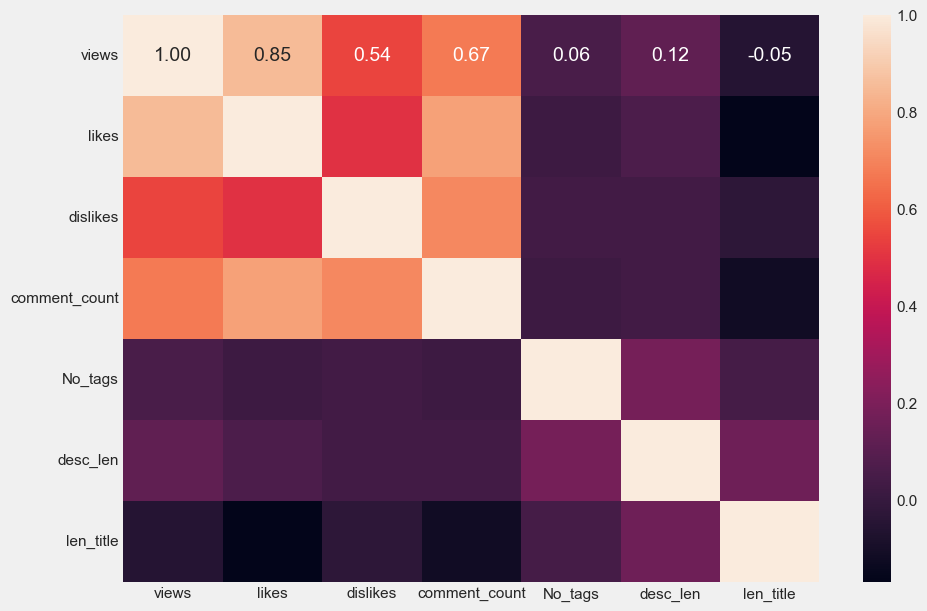

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(data_yt2[num].corr(), annot=True, fmt='.2f')
plt.show()

#### Insight:
- likes have the highest correlation (0.85) with views. This feature could potentially impact the prediction of views as the target variable.
- comment_count, with a correlation of 0.67 to views, is the second-highest predictor of views. This suggests that comment count could be a valuable feature for predicting video viewership.
- dislikes, with a correlation of 0.54 to views, are the third-highest predictor of views. Similar to comment count, this suggests that dislikes could also be a valuable feature for predicting video viewership

# Data Preprocessing

In [57]:
# Adding target features
data_yt['views_segmentasi'] = data_yt['views'].apply(segmentasi_views)
data_yt['views_segmentasi'] = data_yt['views_segmentasi'].apply(lambda x: 1 if x == 'tinggi' else 0)

## Duplicate rows

In [58]:
# Check for duplicates
data_yt.duplicated().sum()

4229

#### There are a total of 4229 duplicate rows
- A row is flagged as a duplicate when all its values across all columns match the values of another row or rows in the DataFrame.
- Duplicate rows are typically dropped upon discovery since they contains the same values with other rows and might cause bias.

In [59]:
# Drop row with duplicates
data_yt = data_yt.drop_duplicates()

## Missing Values

In [60]:
# Splitting dataset
X = data_yt.drop(columns=['views','views_segmentasi'], axis=1)
y = data_yt['views_segmentasi']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26049, 17), (6513, 17), (26049,), (6513,))

In [62]:
miscol_temp = pd.DataFrame(columns=['Columns','Num_train'])
miscol_temp_test = pd.DataFrame(columns=['Columns','Num_test'])

In [63]:
# Check for missing values for each the train and test data
for col in X_train.columns:
    col_misval = X_train[col].isna().sum()
    if col_misval > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval]
        
for col in X_test.columns:
    col_misval = X_test[col].isna().sum()
    if col_misval > 0:
        miscol_temp_test.loc[len(miscol_temp_test)] = [col, col_misval]

In [64]:
# merge the two dataset
merged_misval_df = pd.merge(miscol_temp, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)

merged_misval_df

,Columns,Num_train,Num_test
0,description,34,10


#### There are a total of 1 column with missing value
- description

### Handling missing values

In [65]:
# the missing values in columns 'description' is replaced by the most frequent value.
desc_mode = X_train['description'].mode()[0]
X_train['description'] = X_train['description'].fillna(desc_mode)
X_test['description'] = X_test['description'].fillna(desc_mode)

In [66]:
X_train.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

In [67]:
X_test.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26049, 17), (6513, 17), (26049,), (6513,))

## Feature Engineering

#### Notes
columns added:
- day_segmentation
- time_segmentation

In [69]:
# Converting trending_date to numerical
# Assumption was that the days it took the videos to be trendy
def trending_conversion(df):
    df['trending_date'] = pd.to_datetime(df['trending_date'])
    df['trending_date'] = (df['trending_date'] - df['publish_date']).dt.days

In [70]:
trending_conversion(X_train)
trending_conversion(X_test)

In [71]:
# publish_dates are converted how many days in difference to the first january of 2019
# This is done to prevent dtypes error in further analysis
# Also to anchor the values to a specific date in time.
def publishdate_conversion(df):
    specific_date = pd.Timestamp('2019-01-01')
    df['publish_date'] = (specific_date - df['publish_date']).dt.days

In [72]:
# Convert publish_date from full date format into only days
publishdate_conversion(X_train)
publishdate_conversion(X_test)

In [73]:
# Convert publish_time into 4 categories
time_conversion(X_train)
time_conversion(X_test)

In [74]:
# Convert tags into 4 categories
tags_conversion(X_train)
tags_conversion(X_test)

In [75]:
# Convert title into 4 categories
title_conversion(X_train)
title_conversion(X_test)

In [76]:
X_train['publish_time'].value_counts()

publish_time
Afternoon    9760
Morning      8949
Night        4864
Evening      2476
Name: count, dtype: int64

In [77]:
X_test['publish_time'].value_counts()

publish_time
Afternoon    2473
Morning      2191
Night        1230
Evening       619
Name: count, dtype: int64

In [78]:
X_train['tags'].value_counts()

tags
Few        12088
Several    12009
Many        1033
Single       919
Name: count, dtype: int64

In [79]:
X_test['tags'].value_counts()

tags
Few        3044
Several    2978
Many        262
Single      229
Name: count, dtype: int64

In [80]:
X_train['title'].value_counts()

title
Long             17566
Moderate          4936
Top 10 Length     2969
Short              578
Name: count, dtype: int64

In [81]:
X_test['title'].value_counts()

title
Long             4360
Moderate         1256
Top 10 Length     751
Short             146
Name: count, dtype: int64

## Encoding

In [82]:
x_train_cat = X_train.select_dtypes(include='object')
x_train_cat.columns

Index(['title', 'channel_title', 'publish_time', 'tags', 'description'], dtype='object')

In [83]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah nilai kategorikal menjadi numerik
def encode_features(df):
# Membuat objek LabelEncoder
    label_encoder = LabelEncoder()
    
    for features in x_train_cat:
        df[features] = label_encoder.fit_transform(df[features])

# Menampilkan DataFrame setelah perubahan
encode_features(X_train)
encode_features(X_test)

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26049 entries, 14606 to 24758
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   trending_date           26049 non-null  int64
 1   title                   26049 non-null  int32
 2   channel_title           26049 non-null  int32
 3   category_id             26049 non-null  int64
 4   publish_time            26049 non-null  int32
 5   tags                    26049 non-null  int32
 6   likes                   26049 non-null  int64
 7   dislikes                26049 non-null  int64
 8   comment_count           26049 non-null  int64
 9   comments_disabled       26049 non-null  bool 
 10  ratings_disabled        26049 non-null  bool 
 11  video_error_or_removed  26049 non-null  bool 
 12  description             26049 non-null  int32
 13  No_tags                 26049 non-null  int64
 14  desc_len                26049 non-null  int64
 15  len_title           

## Handling Outliers

In [85]:
df_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
df_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [86]:
# Creating function to get the inner fence of outliers
def outlier_values(df, df_output):
    for col in df:
        id_dtypes = df[col].dtypes
        if id_dtypes != 'bool':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outlier = (Q3 + 1.5 * IQR)
            if outlier > 0:
                df_output.loc[len(df_output)] = [col, outlier.round(2)]

In [87]:
outlier_values(X_train, df_outlier_train)
outlier_values(X_test, df_outlier_test)

In [88]:
# merge the two dataset
merged_outlier_df = pd.merge(df_outlier_train, df_outlier_test, on='Features', how='inner').sort_values(by=['Train_upper_outlier'], ascending=False)

merged_outlier_df

,Features,Train_upper_outlier,Test_upper_outlier
6,likes,29882.5,28721.0
9,description,18983.0,7481.5
8,comment_count,2889.0,2739.0
11,desc_len,2511.5,2544.5
7,dislikes,2217.5,2191.0
2,channel_title,2207.0,1718.5
13,publish_date,535.5,522.0
12,len_title,146.5,146.5
10,No_tags,44.5,42.0
3,category_id,25.5,25.5


In [89]:
# Create a dataframe to contain the calculated values
df_perc_temp = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [90]:
for index, row in merged_outlier_df.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)
    
    df_perc_temp.loc[len(df_perc_temp)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [91]:
df_perc_temp.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages
0,likes,15.08,15.46
2,comment_count,12.80,13.57
4,dislikes,11.92,12.08
13,title,11.40,11.53
9,category_id,8.23,8.35
3,desc_len,4.96,4.71
8,No_tags,1.16,1.81
10,trending_date,0.42,0.54
1,description,0.00,0.00
5,channel_title,0.00,0.00


#### Notes:
- There are 14 features containing outliers, 6 of which (description, channel_title, publish_date, len_title, publish_time, tags) have close to zero values beyond their upper outlier threshold.
- There are 4 features with the highest percentages of outliers, which are "likes", "comment_count", "dislikes", and "title" with more than 10% of their values as outliers. This indicates that a significant number of data points fall outside the expected range of the majority of the data in a column. This would suggests that the central tendency (mean, median) of the features is highly distorted.
- According to National Institute of Standards and Technology, any values that exceed the upper inner fence of outliers (Q3 + 1.5*IQR) are considered to be mild outliers.

In [92]:
transform_train = X_train.skew() > 1

# Do log transformation
X_train.loc[:, transform_train] = X_train.loc[:, transform_train].apply(lambda x: np.log1p(x))

# Apply the same transformation to the testing set (to maintain consistency)
X_test.loc[:, transform_train] = X_test.loc[:, transform_train].apply(lambda x: np.log1p(x))

# Display the transformed DataFrames
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
trending_date,26049.0,1.060854,0.373113,0.000000,0.693147,1.098612,1.386294,5.402677
title,26049.0,0.313727,0.488313,0.000000,0.000000,0.000000,0.693147,1.386294
channel_title,26049.0,721.595762,412.917949,0.000000,337.000000,738.000000,1085.000000,1366.000000
category_id,26049.0,21.601712,6.512323,1.000000,23.000000,24.000000,24.000000,43.000000
publish_time,26049.0,1.342316,1.161032,0.000000,0.000000,2.000000,2.000000,3.000000
tags,26049.0,1.067527,1.030371,0.000000,0.000000,1.000000,2.000000,3.000000
likes,26049.0,7.994177,2.280572,0.000000,6.685861,7.945910,9.428190,14.884595
dislikes,26049.0,5.694375,1.804206,0.000000,4.615121,5.690359,6.854355,14.250546
comment_count,26049.0,5.624136,2.222424,0.000000,4.317488,5.723585,7.090910,13.601771
comments_disabled,26049.0,0.023056,0.124329,0.000000,0.000000,0.000000,0.000000,0.693359


In [93]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
trending_date,6513.0,1.052568,0.378076,0.000000,0.693147,1.098612,1.386294,5.398163
title,6513.0,0.318148,0.490028,0.000000,0.000000,0.000000,0.693147,1.386294
channel_title,6513.0,561.210041,320.005831,0.000000,271.000000,571.000000,850.000000,1062.000000
category_id,6513.0,21.605251,6.577969,1.000000,23.000000,24.000000,24.000000,43.000000
publish_time,6513.0,1.334408,1.166147,0.000000,0.000000,2.000000,2.000000,3.000000
tags,6513.0,1.060187,1.030434,0.000000,0.000000,1.000000,2.000000,3.000000
likes,6513.0,7.988250,2.270403,0.000000,6.687109,7.929126,9.390159,14.792585
dislikes,6513.0,5.674248,1.800650,0.000000,4.574711,5.652489,6.840547,14.118316
comment_count,6513.0,5.613658,2.215811,0.000000,4.317488,5.733341,7.039660,13.626474
comments_disabled,6513.0,0.023209,0.124634,0.000000,0.000000,0.000000,0.000000,0.693359


In [94]:
# Creating dataframe for each the transformed train and test data
transformed_outlier_train = pd.DataFrame(columns=['Features','Train_upper_outlier'])
transformed_outlier_test = pd.DataFrame(columns=['Features','Test_upper_outlier'])

In [95]:
outlier_values(X_train, transformed_outlier_train)
outlier_values(X_test, transformed_outlier_test)

In [96]:
# merge the two dataset
merged_outlier_transformed = pd.merge(transformed_outlier_train, transformed_outlier_test, on='Features', how='inner').sort_values(by=['Train_upper_outlier'], ascending=False)

merged_outlier_transformed

,Features,Train_upper_outlier,Test_upper_outlier
9,description,18983.00,7481.50
2,channel_title,2207.00,1718.50
13,publish_date,535.50,522.00
12,len_title,146.50,146.50
10,No_tags,44.50,42.00
3,category_id,25.50,25.50
6,likes,13.54,13.44
8,comment_count,11.25,11.12
7,dislikes,10.21,10.24
11,desc_len,8.92,8.94


In [97]:
# Creating dataframe to contain the values
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [98]:
# Calculate the percentages
for index, row in merged_outlier_transformed.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [99]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages
1,category_id,8.23,8.35
0,No_tags,1.16,1.81
4,dislikes,0.59,0.69
3,comment_count,0.29,0.43
2,likes,0.26,0.35
5,trending_date,0.09,0.09


#### Notes:
- Out of 14 features, There are only 6 features left with the presence of outliers, with 4 features (category_id, No_tags, dislikes, comment_count, likes, trending_date) is still has a fairly moderate percentages of outliers, and 1 feature (trending_date) is close to zero percent.
- Logarithmic transformation manages to reduce 8 out of 14 features to very close to zero percent, which are promptly excluded.

In [100]:
from scipy.stats.mstats import winsorize

#Set the lower and upper limit of percentile
for col in perc_outlier_transformed['Features']:
    X_train[col] = winsorize(X_train[col], limits=[0.1, 0.1])
    X_test[col] = winsorize(X_test[col], limits=[0.1, 0.1])

In [101]:
# Creating dataframe to contain the values
perc_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [102]:
# Calculating the percentages and display the result of winsorization
for index, row in merged_outlier_transformed.iterrows():
    train_outlier_val = row['Train_upper_outlier']
    test_outlier_val = row['Test_upper_outlier']
    
    train_outlier_count = X_train[row['Features']] > train_outlier_val
    test_outlier_count = X_test[row['Features']] > test_outlier_val
    
    train_outlier_percentage = round(train_outlier_count.sum()/len(X_train)*100,2)
    test_outlier_percentage = round(test_outlier_count.sum()/len(X_test)*100,2)

    if train_outlier_percentage > 0 and test_outlier_percentage > 0:
        perc_outlier_transformed.loc[len(perc_outlier_transformed)] = [row['Features'], train_outlier_percentage, test_outlier_percentage]

In [103]:
perc_outlier_transformed.sort_values('Train_outlier_percentages', ascending=False)

,Features,Train_outlier_percentages,Test_outlier_percentages


#### Notes:
- There are 0 features left after using winsorization.
- By applying winsorization with the 10th and 90th percentile limits, this means that any values below the 10th percentile will be replaced with the value at the 10th percentile, and any values above the 90th percentile will be replaced with the value at the 90th percentile

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26049, 17), (6513, 17), (26049,), (6513,))

## SMOTE
- Oversampling technique that helps to improve the performance of machine learning models by balancing the class distribution, particularly useful when the minority class is underrepresented.
- SMOTE works by creating synthetic examples from the minority class by interpolating between existing minority class instances.

In [105]:
from imblearn.over_sampling import SMOTE

#handle imbalance target using SMOTE
smt = SMOTE(random_state =2)
smt.fit(X_train, y_train)
X_smote, y_smote = smt.fit_resample(X_train, y_train)

#display row and column for data smote & data test
X_smote.shape, X_train.shape, y_smote.shape, y_test.shape

((27208, 17), (26049, 17), (27208,), (6513,))

## Features Selection
- Feature selection is a crucial step in machine learning. 
- Reducing the number of features can lead to simpler models, which are less prone to overfitting. 
- Overfitting occurs when a model performs well on the training data but fails to generalize to new, unseen data.

### Numerical features selection
Column selection criteria for categorical data:
- No null values
- p-value < 0.05
- correlation coefficient <= 0.7

In [106]:
# Selecting only numerical columns
x_train_num = X_smote.select_dtypes(exclude='object')
x_train_num.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'No_tags', 'desc_len', 'len_title', 'publish_date'],
      dtype='object')

In [107]:
from sklearn.feature_selection import f_classif

#Because our two arrays are incompatible in dimensions(one dataset really big while others really small)
#we use ANOVA or F-statistic

F_statistic, p_values = f_classif(x_train_num, y_smote)

#create dataframe 
df_anova = pd.DataFrame(data= {'Numerical Feature':x_train_num.columns.values,
                                'p-value': p_values.round(5)})

df_anova.shape

(17, 2)

In [108]:
df_anova

,Numerical Feature,p-value
0,trending_date,0.00000
1,title,0.00000
2,channel_title,0.00000
3,category_id,0.00000
4,publish_time,0.67881
5,tags,0.00000
6,likes,0.00000
7,dislikes,0.00000
8,comment_count,0.00000
9,comments_disabled,0.00000


In [109]:
#filter only column that has p-value < 0.05
temp_num_cols = df_anova[df_anova['p-value']<0.05]['Numerical Feature'].tolist()
col_exclu_num = [col for col in df_anova['Numerical Feature'] if col not in temp_num_cols]

# print excluded feature information
print(f'Number of excluded columns: {len(df_anova)-len(temp_num_cols)}')
print(f'Excluded column: {col_exclu_num}')

temp_num_cols

Number of excluded columns: 1
Excluded column: ['publish_time']


['trending_date',
 'title',
 'channel_title',
 'category_id',
 'tags',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'No_tags',
 'desc_len',
 'len_title',
 'publish_date']

- 1 column 'publish_time' is excluded because the p-value is >0.05

<Axes: >

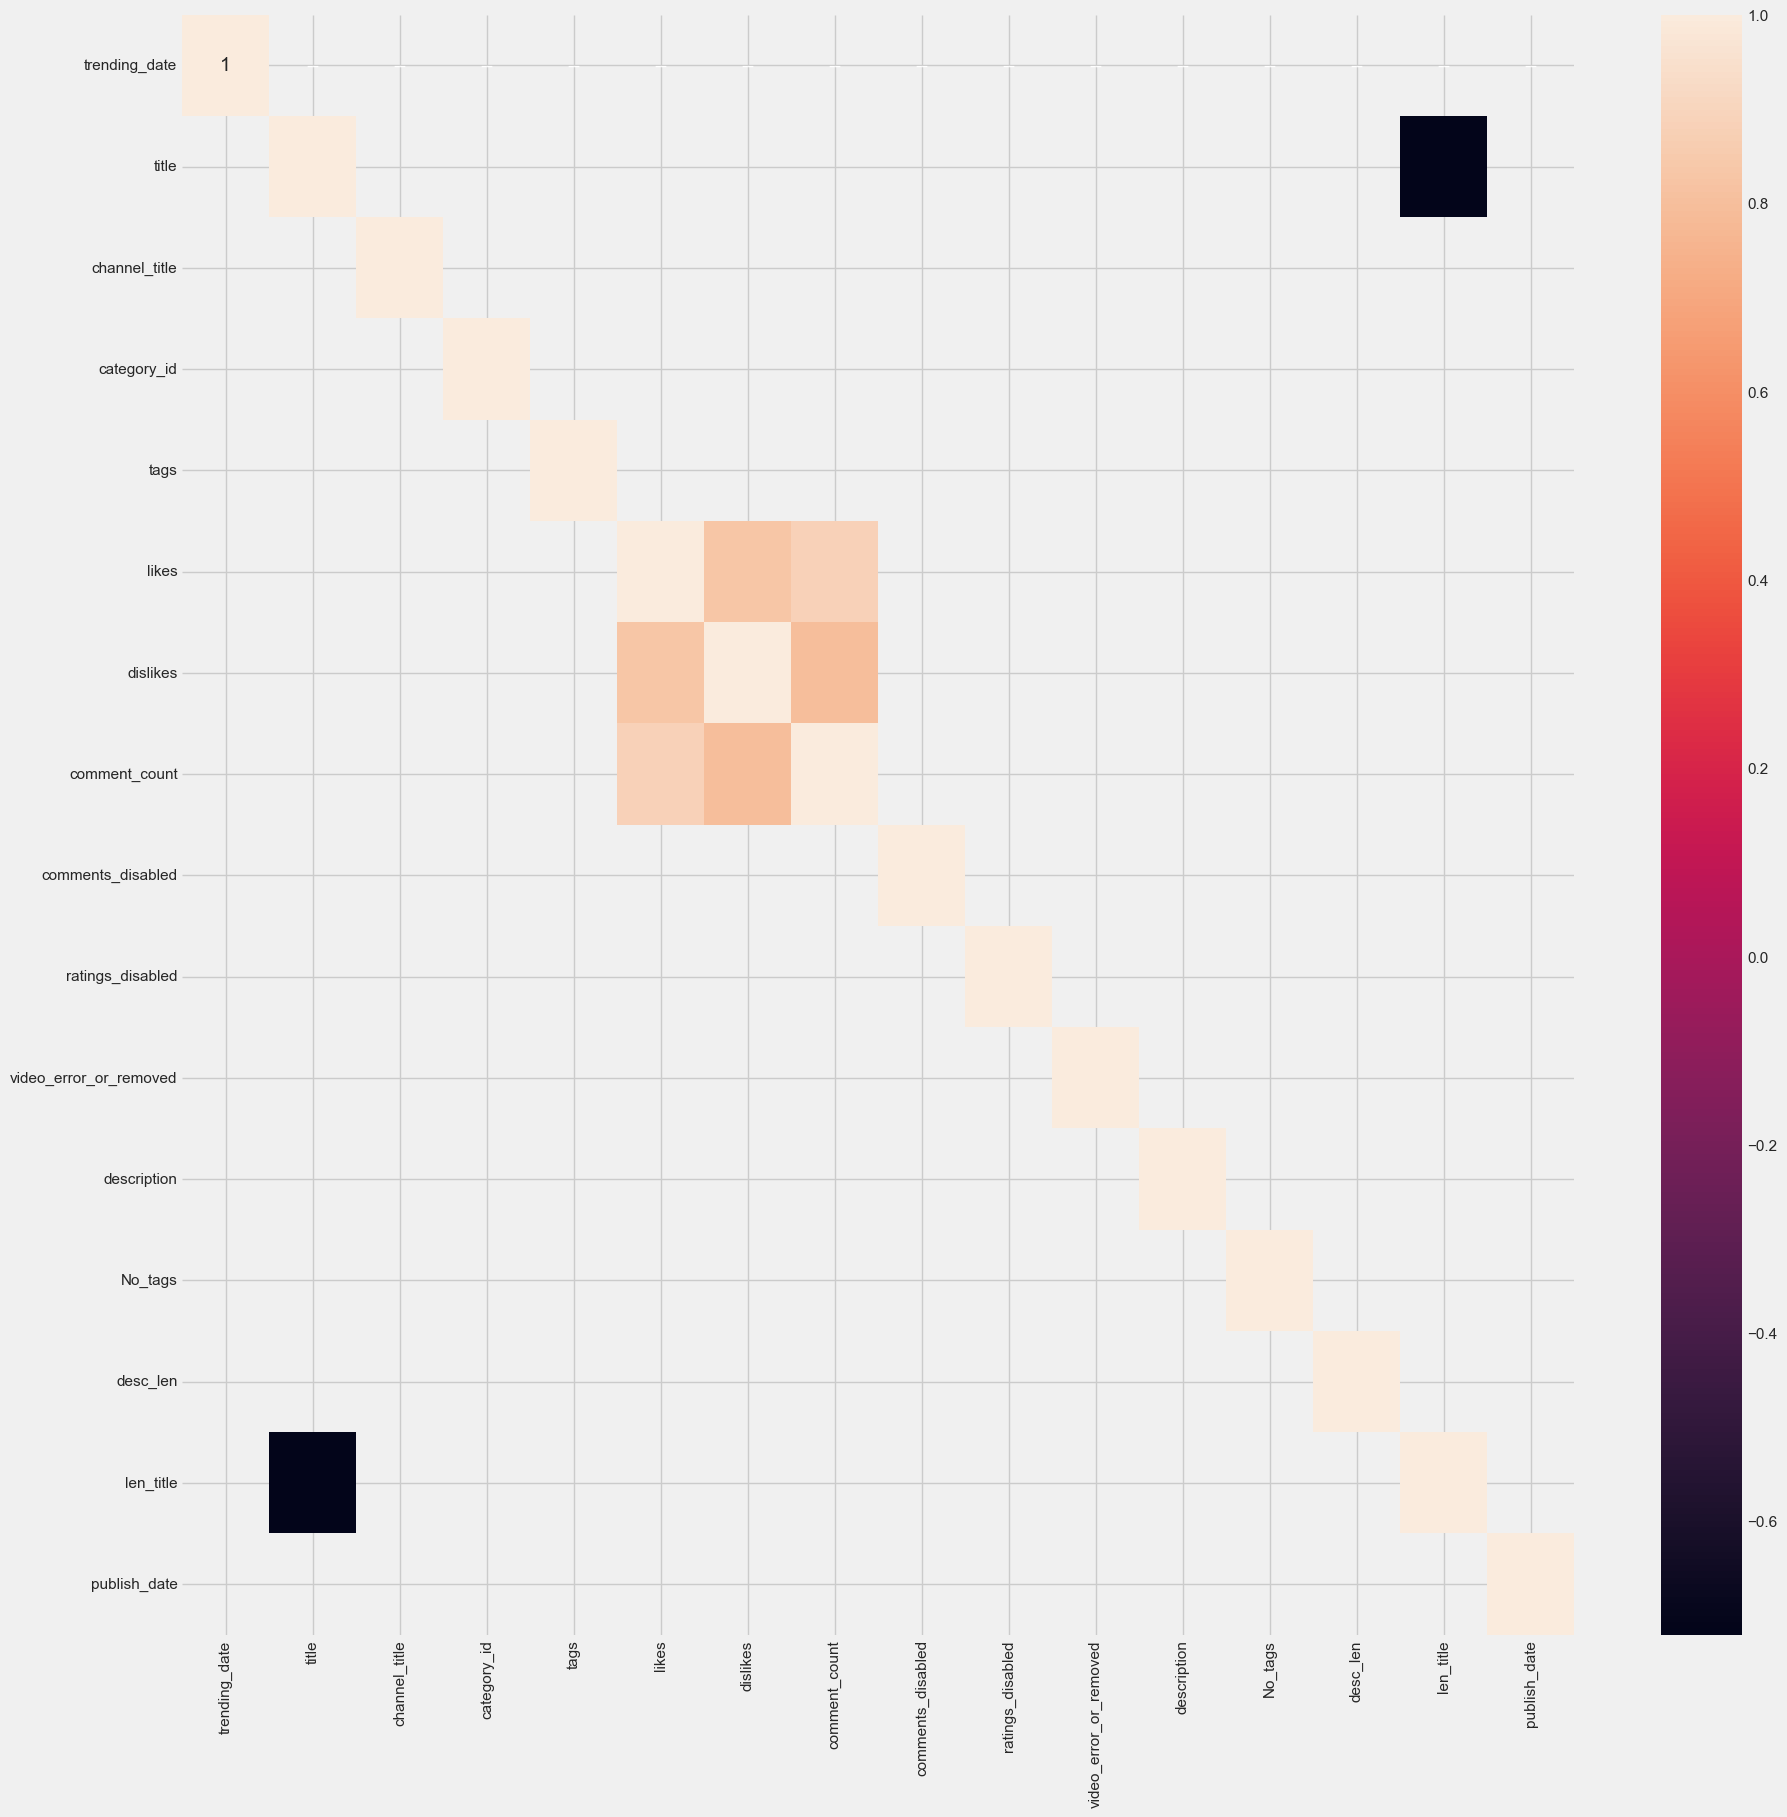

In [110]:
#select only the columns with correlation < 0.7
corr = X_smote[temp_num_cols].corr()
fig = plt.figure(figsize=(20,20))

# create heatmap to show correlation between features with only those with >0.7 correlation
sns.heatmap(corr, annot=True, mask=abs(corr)<=0.7)

In [111]:
#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype = bool), k=1))

In [112]:
# Filter columns with correlation below 0.7
corr_selected_col = [col for col in mask.columns if any (mask[col] <= 0.7)]
col_excluded = [col for col in temp_num_cols if col not in corr_selected_col]

# print excluded feature information
print(f'Number of excluded columns: {len(temp_num_cols)-len(corr_selected_col)}')
print(f'Excluded column: {col_excluded}')

corr_selected_col

Number of excluded columns: 1
Excluded column: ['trending_date']


['title',
 'channel_title',
 'category_id',
 'tags',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'No_tags',
 'desc_len',
 'len_title',
 'publish_date']

- 1 column 'trending_date' is excluded because it's correlation value is above the 0.7 threshold

In [113]:
# apply selected columns to train & test data
X_train_final = X_smote[corr_selected_col]
X_test_final = X_test[corr_selected_col]

In [114]:
# Check to make sure there are no null values
X_train_final.isnull().sum()

title                     0
channel_title             0
category_id               0
tags                      0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

# Modelling

## XGBoost
- XGBoost is an ensemble method, which combines multiple weak learners (often decision trees).
- XGBoost is robust to missing data and shifts in the trend, and typically handles outliers quite well.

In [115]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

def class_report(y_proba, y):
    y_pred_class = []

    for val in y_proba:
        if val > 0.5:
            y_pred_class.append(1)
        else:
            y_pred_class.append(0)
    
    print(classification_report(y_true = y, y_pred= y_pred_class))
    conf_matrix(y, y_pred_class)

def conf_matrix(y, y_pred):
    conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)

    print(f"Test data Confusion Matrix:")
    print(conf_matrix,'\n')
    
model = XGBRegressor()

# Train the model
model.fit(X_train_final, y_smote)

# Make predictions on the testing set
y_pred_proba_train = model.predict(X_train_final)
y_pred_proba_test = model.predict(X_test_final)

print(f'AUC train probability: ', roc_auc_score(y_true= y_smote , y_score= y_pred_proba_train).round(4))
print(f'AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test).round(4))

class_report(y_pred_proba_test, y_test)

AUC train probability:  0.9961
AUC test probability:  0.9478
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3420
           1       0.88      0.86      0.87      3093

    accuracy                           0.88      6513
   macro avg       0.88      0.87      0.88      6513
weighted avg       0.88      0.88      0.88      6513

Test data Confusion Matrix:
[[3058  362]
 [ 448 2645]] 



#### Notes:
#### AUC
- AUC (Area Under Curve) according to (Narkhede, 2018) is a performance measurement or metric used to evaluate the performance of classification models.
- Higher AUC value indicates better class separation, as the model is able to distinguish between the positive and negative classes more effectively.
- AUC > 0.8: Generally is considered a good performance.
- AUC > 0.9: Is considered a very good performance.
- AUC < 0.5: Indicates the model performs no better than random.

#### Confusion matrix
To maximize revenue using the prediction results, it's generally better to consider both true positives (visitors correctly predicted to generate revenue) and false negatives (visitors incorrectly predicted to not generate revenue). This would helps in avoiding potential losses on paying customers while also potentially converting non-paying customer to paying customer.

#### Insight:
- The model excels at identifying both high-view (class 1) and low-view (class 0) videos, achieving a precision of 88% for high views and 87% for low views.
- The model achieves a good recall score (greater than 0.70) for both classes. This suggests that the model can identify a significant portion of videos with high view counts, as well as those that don't.
- The model achieves good F1-scores for both class (1) and class (0). This indicates a balanced performance between precision and recall, suggesting that the model can effectively identify a significant portion of videos with high view potential.
- An accuracy of 88% suggests that the model is generally effective at making accurate predictions and can successfully differentiate between the two classes.
- A high AUC score (0.9) achieved by the model on both training and test data suggests very good model performance. This indicates the model's effectiveness in distinguishing between positive and negative classes.

## Features Importance

In [116]:
feature_importances = model.feature_importances_

In [117]:
# Create new dataframe for top 5 feature
imp_fts = pd.DataFrame(columns=['Features','importance'])

In [118]:
# Get and sort feature importances with the feature names
sorted_importances = sorted(zip(X_test_final.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Assign each features alongside it's importance values into the previously created dataframe
for feature, importance in sorted_importances[:5]:
    imp_fts.loc[len(imp_fts)] = [feature, importance]

In [119]:
print('Top 5 Feature Importances:')
imp_fts

Top 5 Feature Importances:


,Features,importance
0,dislikes,0.450775
1,ratings_disabled,0.094178
2,category_id,0.071021
3,channel_title,0.049538
4,comment_count,0.048736


Text(0.5, 1.0, 'Top 5 Highest Features Importance')

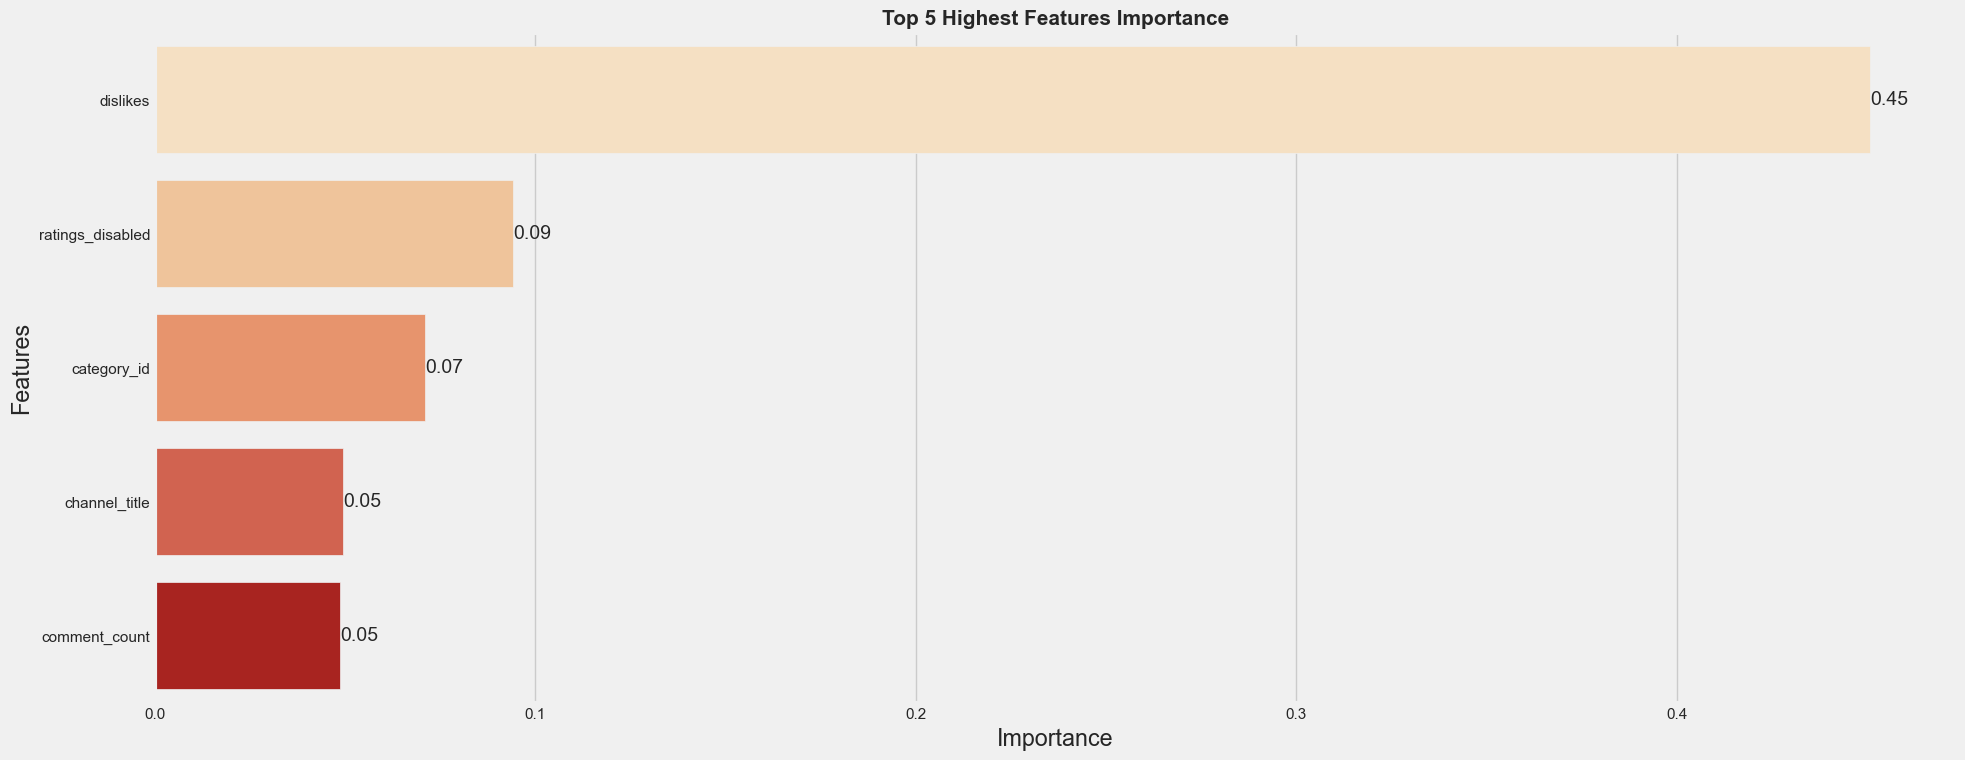

In [120]:
# Create barplot for top 5
ax_hbartype_gr = sns.barplot(y='Features', x='importance',data=imp_fts, palette='OrRd', orient='horizontal')

# Formatting plot
plt.bar_label(ax_hbartype_gr.containers[0], fmt='%.2f')
plt.xlabel('Importance')
plt.title('Top 5 Highest Features Importance', fontsize=15, weight ='extra bold')

#### Insight:
- 5 column are found with the highest importance value, which suggest that these columns are likely to be the highest determining factor in predicting views as the target features.
- The usage of the these top 5 features as the predictor would possibly suggest better result when it comes to predicting the target feature.

In [121]:
# Create new dataframe for top 5 feature
bott_imp_fts = pd.DataFrame(columns=['Features','importance'])

# Get and sort feature importances with the feature names
bott_sorted_importances = sorted(zip(X_test_final.columns, feature_importances), key=lambda x: x[1], reverse=False)

# Assign each features alongside it's importance values into the previously created dataframe
for feature, importance in bott_sorted_importances[:5]:
    bott_imp_fts.loc[len(bott_imp_fts)] = [feature, importance]

In [122]:
# Create dataframe for the bottom 5 features
bott_imp_fts = bott_imp_fts.sort_values('importance',ascending=False)
bott_imp_fts

,Features,importance
4,publish_date,0.033557
3,tags,0.018098
2,comments_disabled,0.017264
1,title,0.013642
0,video_error_or_removed,0.000000


Text(0.5, 1.0, 'Top 5 Lowest Features Importance')

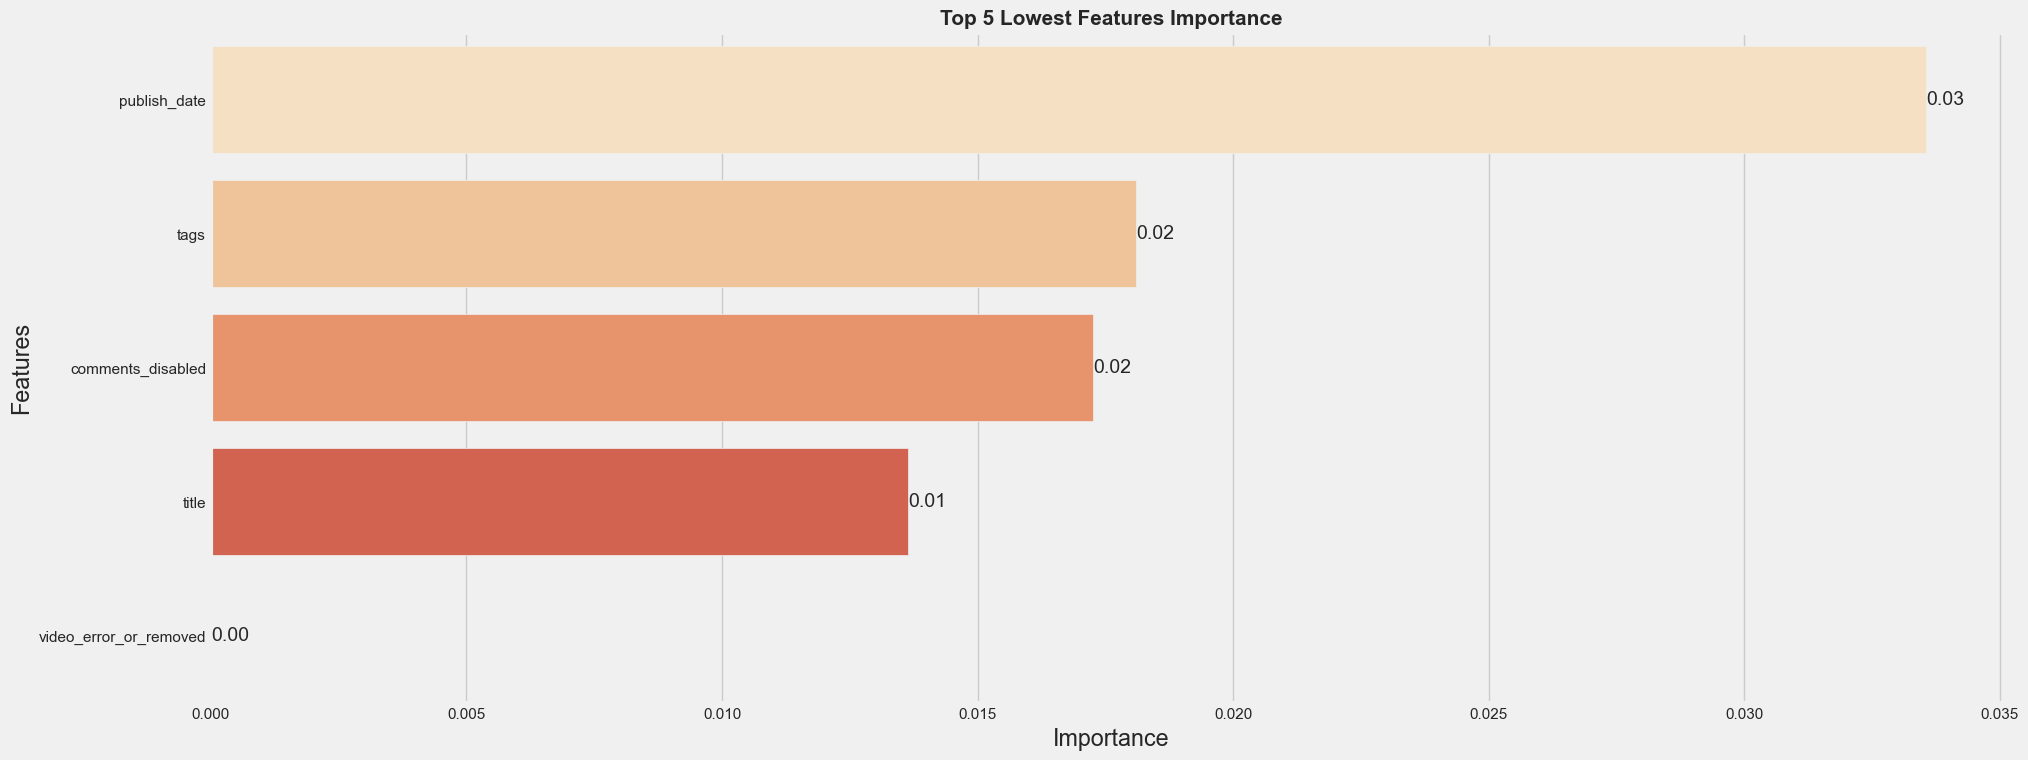

In [123]:
# Create barplot for bottom 5
ax_imp_fts = sns.barplot(y='Features', x='importance',data=bott_imp_fts, palette='OrRd', orient='horizontal')

# Formatting plot
plt.bar_label(ax_imp_fts.containers[0], fmt='%.2f')
plt.xlabel('Importance')
plt.title('Top 5 Lowest Features Importance', fontsize=15, weight ='extra bold')

#### Insight:
- 5 column are found with the lowest importance value, which suggest that these columns are likely to be the features that would matter the least and could potentially intoduce bias to the model predictions.
- Excluding these 5 features in further analysis could lead to model prediction improvement.

## Result

In [125]:
# Create dataframe with the best 5 features
best_fts_df = pd.DataFrame({'likes':X_test_final['likes'],
                        'dislikes':X_test_final['dislikes'],
                        'len_title':X_test_final['len_title'],
                        'category_id':X_test_final['category_id'],
                        'desc_len':X_test_final['desc_len'],
                        'origin':y_test,
                        'Preds':y_pred_proba_test}).sort_values('Preds', ascending=False)

In [126]:
best_fts_df

,likes,dislikes,len_title,category_id,desc_len,origin,Preds
19233,7.401842,6.324359,70,24,5.468060,1,1.281193
34805,10.860671,7.859799,99,10,8.131825,1,1.254017
34676,10.860671,7.859799,99,10,8.131825,1,1.254017
35048,10.860671,7.859799,99,10,8.131825,1,1.254017
6249,9.227886,6.434547,75,25,7.234898,0,1.242835
...,...,...,...,...,...,...,...
27727,8.236685,4.890349,57,23,6.066108,0,-0.239874
31660,8.691146,5.517453,95,24,7.036148,0,-0.249979
8382,5.749393,5.860786,94,24,6.208590,0,-0.288535
27085,8.224967,5.288267,97,24,7.130099,0,-0.310941


In [127]:
# export prediction result to a .csv file
best_fts_df.to_csv('xgboost_result.csv')

In [128]:
# Group based on category
df_grp_temp = best_fts_df.groupby('category_id').agg(avg_views_pred = ('Preds','mean'), avg_views_origin=('origin','mean')).sort_values('avg_views_pred', ascending=False)
df_grp_temp.reset_index(inplace=True)

df_grp_temp['avg_views_pred'] = df_grp_temp['avg_views_pred']/1000
df_grp_temp['avg_views_origin'] = df_grp_temp['avg_views_origin']/1000

In [129]:
df_grp_temp

,category_id,avg_views_pred,avg_views_origin
0,15,0.001013,0.001000
1,20,0.000973,0.001000
2,17,0.000708,0.000727
3,10,0.000702,0.000716
4,23,0.000627,0.000623
5,22,0.000406,0.000460
6,24,0.000400,0.000438
7,25,0.000307,0.000308
8,19,0.000042,0.000000


Text(0, 0.5, 'Percentage by Total Clients')

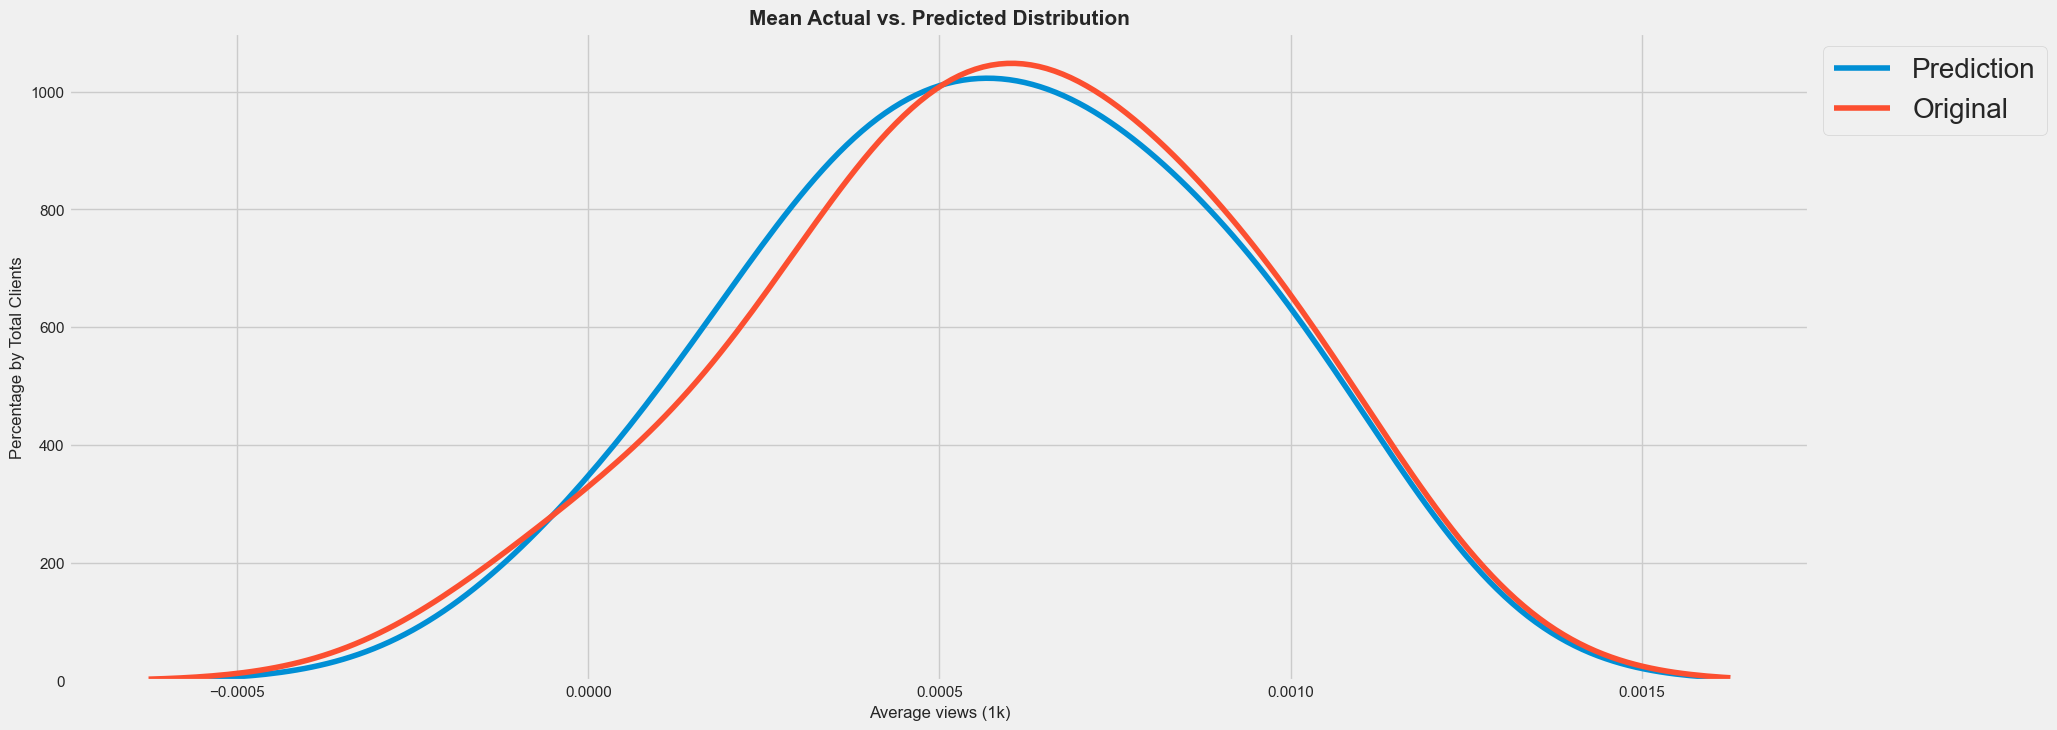

In [130]:
plt.figure(figsize=(20,8))

# Create plot
ax_comp_pred = sns.kdeplot(df_grp_temp['avg_views_pred'])
ax_comp_origin = sns.kdeplot(df_grp_temp['avg_views_origin'])

# Formating plot
plt.legend(['Prediction', 'Original'], bbox_to_anchor=(1,1), loc='upper left', prop={'size': 20})
plt.title("Mean Actual vs. Predicted Distribution", fontsize=15, weight ='extra bold')
plt.xlabel('Average views (1k)',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

#### Insight:
- The distibution of average value from both the original and the predicted values are very close to overlaping, this suggest that model is capturing the distribution of views across different categories reasonably well.
- This finding is inline with the evaluation done previously throughout the analysis, this suggest that overall the XGBoost model could predict views as target with fairly good accuracy whilst still giving more room for further improvement based on the analyzed features through Features Importance.

# Business Recommendation

- Analysis of video trends and like-to-view ratios suggests that a higher number of likes increases the likelihood of a video achieving high viewership. This implies that the number of likes (or dislikes) on a video might influence viewers' decisions to continue watching, as both can potentially spark or deter interest.  Furthermore, likes and dislikes can be seen as a way for both creators and viewers to gauge the quality and popularity of a video beforehand. This suggests:
1. Content creators should prioritize avoiding controversial topics when creating content. Following current trends can also be beneficial.
2. Content creators can leverage viewer comments to gain feedback and tailor their content to meet their audience's demands.
- Analysis on how likes and comments affect video view counts reveals that viewers often feel compelled to express their opinions on videos, which can benefit both creators and viewers. The findings also show that videos with enabled comments sections and high like counts tend to achieve higher viewership. This suggests that allowing viewers to share their perspectives, while also having the opportunity to see their opinions validated or challenged by likes and dislikes, significantly impacts viewership.  In other words, videos with ratings enabled appear to have a higher chance of garnering high views compared to those with ratings disabled. Based on this, content creator could:
1. Make sure their audience have a way to voice their opinion on the videos, by keeping rating and comments turned on.
- Analysis of viewer behavior shows that the type of video content significantly impacts viewers' interest in watching.  The analysis also reveals that effective SEO on YouTube can directly influence video relevance within the YouTube recommendation algorithm. This suggests that factors like tags, video type, and category can impact the chances of a video being recommended, ultimately affecting its potential to achieve high viewership. This suggest the need to:
1. Utilize keywords that represent the messages the video tries to convey.
2. Creating videos based on the types or categories that are in demand in order to maintain relevance..